# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_quarterly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_quarterly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [1]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [1]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [2]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [4]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [5]:
dataname_a = "m4_quarterly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.


24000

In [6]:
dataname_b1 = "m4_quarterly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.


5315

In [7]:
dataname_b2 = "m4_quarterly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.


6020

In [8]:
dataname_b3 = "m4_quarterly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.


865

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 24000
length test: 24000

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


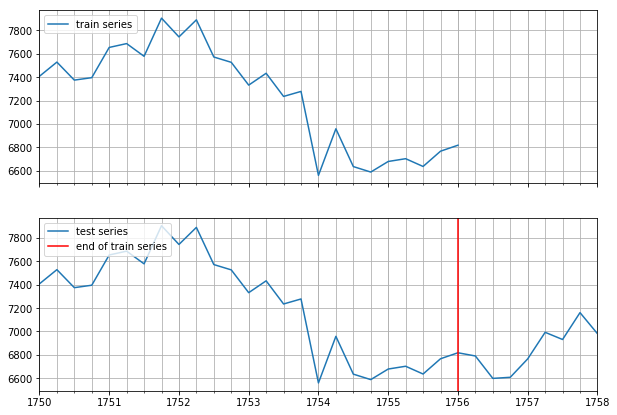

In [9]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 5315
length test: 5315

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


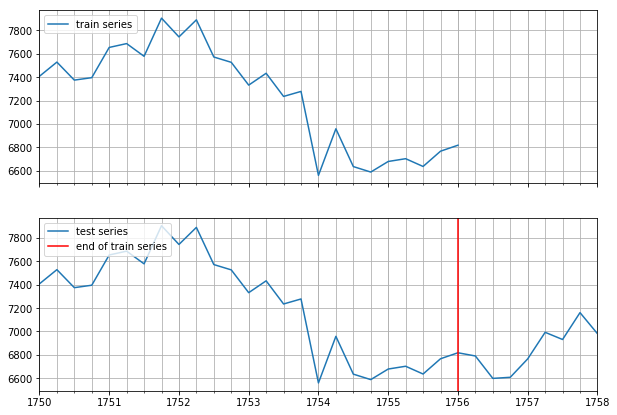

In [10]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [11]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [12]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [13]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='24000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f49e2f3c240>, test=<gluonts.dataset.common.FileDataset object at 0x7f49e2f56ef0>)

 TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='5315')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f49e2ef92b0>, test=<gluonts.dataset.common.FileDataset object at 0x7f49e2ef9278>)


In [15]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


In [16]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [17]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


## Study 1: `m4_quarterly_atm` vs. `m4_quarterly_macro` trained network

- Alternating between Run I - 10 trials A:B vs. 
- Run II - 10 trials of B:B


In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 50/50 [00:01<00:00, 41.67it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 1.206 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.263358
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.45it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 1.128 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.633776
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.87it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[2] Elapsed time 1.069 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.591601
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.88it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.121 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.273800
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.27it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[4] Elapsed time 1.310 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.48it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 1.112 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.003508
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.62it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[39] Elapsed time 1.151 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.054094
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.42it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.239 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.823738
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 44.35it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[41] Elapsed time 1.129 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.806849
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00

INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.788193
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 42.92it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[75] Elapsed time 1.170 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.280183
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 42.19it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 1.189 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.615973
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 43.88it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[77] Elapsed time 1.144 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.789908
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 45.90it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[78] Elapsed time 1.091 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.012575
INFO:root:Epoch[79] Learning rate is 0.000125
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.358501  0.103153  17.074621            0.095317            0.056635   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 39.65it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[0] Elapsed time 1.264 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.155973
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.95it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 1.169 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.628363
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.34it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[2] Elapsed time 1.216 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.645670
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[3] Elapsed time 1.322 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.337573
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.98it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[4] Elapsed time 1.480 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.34it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[38] Elapsed time 1.273 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.947269
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.00it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 1.200 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.060338
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[40] Elapsed time 1.349 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.702910
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.23it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[41] Elapsed time 1.510 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.804254
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.41it/s, avg_epoch_loss=7.27]
INFO:root:Epoc

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.25it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[75] Elapsed time 1.194 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.109794
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.84it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 1.174 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.730030
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.22it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[77] Elapsed time 1.315 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.712016
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.31it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[78] Elapsed time 1.165 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.960059
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.86it/s, avg_epoch_loss=6.97]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.258774  0.101523  17.130113            0.093073             0.05663   

   seed  epochs  num_batches          train data           eval data  
0    43     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 40.79it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 1.232 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.415919
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.25it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 1.109 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.664308
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.94it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 1.094 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.639411
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.66it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[3] Elapsed time 1.179 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.275684
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.93it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[4] Elapsed time 1.436 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.93it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 1.326 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.996664
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.18it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[39] Elapsed time 1.113 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.053009
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.07it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[40] Elapsed time 1.141 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.656925
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.54it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[41] Elapsed time 1.208 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.783160
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.43it/s, avg_epoch_loss=7.21]
INFO:root:Epoch

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 36.62it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[75] Elapsed time 1.373 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.963955
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.13it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.191 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.889152
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.05it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.170 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.606937
INFO:root:Loading parameters from best epoch (57)
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 37.19it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[78] Elapsed time 1.351 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.967671
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██████████| 50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.329203  0.108242  18.423794            0.097718             0.06155   

   seed  epochs  num_batches          train data           eval data  
0    44     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 50/50 [00:01<00:00, 38.90it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 1.290 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.993395
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[1] Elapsed time 1.133 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.642576
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.44it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 1.080 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.611722
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.54it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.267 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.274906
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.05it/s, avg_epoch_loss=7.28]
INFO

100%|██████████| 50/50 [00:01<00:00, 36.65it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[37] Elapsed time 1.367 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.755710
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.60it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 1.297 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.919166
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.03it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[39] Elapsed time 1.224 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.124230
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.91it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[40] Elapsed time 1.293 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.843432
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.85it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[41] Elapsed time 1.400 seconds
INFO:root

100%|██████████| 50/50 [00:01<00:00, 36.84it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[74] Elapsed time 1.364 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.774405
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 44.39it/s, avg_epoch_loss=7]
INFO:root:Epoch[75] Elapsed time 1.131 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.002549
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.31it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 1.279 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.960982
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.71it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[77] Elapsed time 1.296 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.658972
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.40it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[78] Elapsed time 1.457 seconds
INFO:ro

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.300292  0.101515  17.941801            0.093178             0.05795   

   seed  epochs  num_batches          train data           eval data  
0    45     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 50/50 [00:01<00:00, 35.25it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 1.423 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.692538
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.83it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 1.231 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.612929
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.44it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[2] Elapsed time 1.127 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.582227
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[3] Elapsed time 1.306 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.087042
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.95it/s, avg_epoch_loss=7.14]
INFO

100%|██████████| 50/50 [00:01<00:00, 38.55it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[37] Elapsed time 1.303 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.729621
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 35.17it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[38] Elapsed time 1.426 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.985639
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.51it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[39] Elapsed time 1.346 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.076231
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.33it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[40] Elapsed time 1.345 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.703374
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 35.95it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 1.397 seconds
INFO:

INFO:root:Loading parameters from best epoch (53)
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 35.88it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[74] Elapsed time 1.400 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.763819
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 38.73it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[75] Elapsed time 1.296 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.148179
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 37.29it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[76] Elapsed time 1.348 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.906577
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 33.93it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[77] Elapsed time 1.481 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.761961
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████|

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.375985  0.104336  17.559214            0.095286            0.056633   

   seed  epochs  num_batches          train data           eval data  
0    46     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 1.319 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.421190
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.73it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 1.158 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.552097
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.76it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[2] Elapsed time 1.123 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.542774
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.01it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.170 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.186551
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.97it/s, avg_epoch_loss=7.13]
INFO

100%|██████████| 50/50 [00:01<00:00, 36.73it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[37] Elapsed time 1.367 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.810112
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.12it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 1.392 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.917351
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.03it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[39] Elapsed time 1.287 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.246917
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.23it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[40] Elapsed time 1.393 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.772721
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 34.77it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[41] Elapsed time 1.445 seconds
INFO

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.009969
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 37.91it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[74] Elapsed time 1.322 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.770544
INFO:root:Loading parameters from best epoch (44)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 39.84it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[75] Elapsed time 1.259 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.132000
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.48it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[76] Elapsed time 1.240 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.050494
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.28it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[77] Elapsed time 1.191 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.750771
INFO:root:E

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.768006  0.116618  21.680005            0.110046            0.066986   

   seed  epochs  num_batches          train data           eval data  
0    47     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 35.75it/s, avg_epoch_loss=8.25]
INFO:root:Epoch[0] Elapsed time 1.405 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.245234
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.77it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.233 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.677831
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.57it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.237 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.702863
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.00it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[3] Elapsed time 1.321 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.303921
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.21it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[4] Elapsed time 1.278 seconds
INFO:root:Epoch[4] Evalu

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.92it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[38] Elapsed time 1.358 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.944902
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.63it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[39] Elapsed time 1.275 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.077003
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.52it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[40] Elapsed time 1.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.766994
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.53it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[41] Elapsed time 1.414 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.738713
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.82it/s, avg_epoch_loss=7.24]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.11it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[75] Elapsed time 1.317 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.965568
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[76] Elapsed time 1.323 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.858107
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 35.20it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[77] Elapsed time 1.425 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.634147
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 36.88it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[78] Elapsed time 1.364 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.961133
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 42.07it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[79] Elapsed time 1.195 seconds
INFO

       MASE     sMAPE     MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.298041  0.102741  17.7545            0.093967            0.055781    48   

   epochs  num_batches          train data           eval data  
0     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 40.01it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.255 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.356069
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.60it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 1.101 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.565061
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.19it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[2] Elapsed time 1.218 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.586260
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.64it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.760 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.239077
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 32.91it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 1.525 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 34.96it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[37] Elapsed time 1.436 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.707525
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 40.28it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 1.247 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.077143
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.48it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[39] Elapsed time 1.341 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.036033
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 41.26it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[40] Elapsed time 1.218 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.755019
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.86it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[41] Elapsed time 1.327 seconds
INFO

100%|██████████| 50/50 [00:01<00:00, 36.28it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[74] Elapsed time 1.381 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.705456
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 41.08it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[75] Elapsed time 1.229 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.197343
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.15it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 1.315 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.652652
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 32.24it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.553 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.726698
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.85it/s, avg_epoch_loss=6.99]


100%|██████████| 50/50 [00:01<00:00, 35.70it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[17] Elapsed time 1.419 seconds
INFO:root:Epoch[17] Evaluation metric 'epoch_loss'=6.899636
INFO:root:Epoch[18] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.13it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[18] Elapsed time 1.318 seconds
INFO:root:Epoch[18] Evaluation metric 'epoch_loss'=7.097760
INFO:root:Epoch[19] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[19] Elapsed time 1.327 seconds
INFO:root:Epoch[19] Evaluation metric 'epoch_loss'=7.208804
INFO:root:Epoch[20] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.31it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[20] Elapsed time 1.165 seconds
INFO:root:Epoch[20] Evaluation metric 'epoch_loss'=6.856826
INFO:root:Epoch[21] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.07it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[21] Elapsed time 1.167 seconds
INFO:root:E

INFO:root:Epoch[54] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 42.99it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[54] Elapsed time 1.168 seconds
INFO:root:Epoch[54] Evaluation metric 'epoch_loss'=6.879680
INFO:root:Epoch[55] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 41.88it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[55] Elapsed time 1.204 seconds
INFO:root:Epoch[55] Evaluation metric 'epoch_loss'=7.036002
INFO:root:Epoch[56] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 41.90it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[56] Elapsed time 1.198 seconds
INFO:root:Epoch[56] Evaluation metric 'epoch_loss'=7.052479
INFO:root:Epoch[57] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 39.50it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[57] Elapsed time 1.271 seconds
INFO:root:Epoch[57] Evaluation metric 'epoch_loss'=6.752234
INFO:root:Epoch[58] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 38.75it/s, avg_epoch_loss=7.0

INFO:root:Epoch[90] Evaluation metric 'epoch_loss'=6.860869
INFO:root:Epoch[91] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.33it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[91] Elapsed time 1.382 seconds
INFO:root:Epoch[91] Evaluation metric 'epoch_loss'=6.861402
INFO:root:Epoch[92] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.46it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[92] Elapsed time 1.184 seconds
INFO:root:Epoch[92] Evaluation metric 'epoch_loss'=7.345256
INFO:root:Epoch[93] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.76it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[93] Elapsed time 1.124 seconds
INFO:root:Epoch[93] Evaluation metric 'epoch_loss'=6.658698
INFO:root:Epoch[94] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.98it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[94] Elapsed time 1.284 seconds
INFO:root:Epoch[94] Evaluation metric 'epoch_loss'=6.882324
INFO:root:Epoch[95] Learning rate is 5e-05
100%|██████████| 50/5

      MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.51402  0.10766  18.054184             0.09739            0.057934    50   

   epochs  num_batches          train data           eval data  
0     100           50  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 34.98it/s, avg_epoch_loss=8.18]
INFO:root:Epoch[0] Elapsed time 1.432 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.178529
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.87it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.257 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.682076
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.92it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 1.291 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.686630
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.92it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[3] Elapsed time 1.403 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.339932
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.99it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[4] Elapsed time 1.434 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.28it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[38] Elapsed time 1.425 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.938418
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.56it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[39] Elapsed time 1.308 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.079985
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.37it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.349 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.732537
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 35.25it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[41] Elapsed time 1.427 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.793998
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.95it/s, avg_epoch_loss=7.27]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 34.82it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 1.440 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.871452
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.81it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[76] Elapsed time 1.294 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.042919
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.32it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[77] Elapsed time 1.213 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.713733
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.40it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[78] Elapsed time 1.346 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.640636
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.27it/s, avg_epoch_loss=7.18]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.459205  0.106864  17.921873            0.095794            0.057358   

   seed  epochs  num_batches          train data           eval data  
0    51     100           50  m4_quarterly_macro  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.358501  0.103153  17.074621            0.095317            0.056635   
0  1.258774  0.101523  17.130113            0.093073            0.056630   
0  1.329203  0.108242  18.423794            0.097718            0.061550   
0  1.300292  0.101515  17.941801            0.093178            0.057950   
0  1.375985  0.104336  17.559214            0.095286            0.056633   
0  1.768006  0.116618  21.680005            0.110046            0.066986   
0  1.298041  0.102741  17.754500            0.093967            0.055781   
0  1.337416  0.104273  16.857208            0.094255            0.057366   
0  1.514020  0.107660  18.054184            0.097390            0.057934   
0  1.459205  0.106864  17.921873            0.095794            0.057358   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    43     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    44     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    45     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    46     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    47     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    48     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    49     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    50     100           50  m4_quarterly_macro  m4_quarterly_macro  
0    51     100           50  m4_quarterly_macro  m4_quarterly_macro

In [19]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_macro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 53.17it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[0] Elapsed time 1.883 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.948567
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 51.14it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 1.958 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.425612
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.25it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 1.915 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.132203
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.06it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 1.886 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.227898
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.94it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 2.004 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 51.84it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 1.930 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827149
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.27it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 1.953 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.003809
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 53.07it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 1.886 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.548514
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.32it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[40] Elapsed time 1.950 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.901964
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.58it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[41] Elapsed time 1.903 second

100%|██████████| 100/100 [00:02<00:00, 47.62it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[73] Elapsed time 2.102 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.033950
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 51.17it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 1.958 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.853000
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 51.75it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 1.934 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.777121
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 53.55it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.870 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.890163
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.59it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:01<00:00, 55.29it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[109] Elapsed time 1.814 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.882766
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.96it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.821 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.026332
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.75it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 1.934 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.739722
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.61it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.978 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767785
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.13it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.96it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[146] Elapsed time 1.821 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.880551
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.62it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[147] Elapsed time 1.800 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.679192
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.41it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 1.985 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.916654
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.72it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 1.973 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.830508
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.71it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.487537
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.64it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[183] Elapsed time 1.938 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.813430
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.22it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 2.034 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.741479
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.13it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[185] Elapsed time 1.958 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.842382
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.80it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[186] Elapsed time 2.052 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.875904
INFO:root:Epoch[187] Learning rate is 5e-05

      MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.27161  0.10202  14.253511            0.091292            0.052278    42   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 46.04it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[0] Elapsed time 2.174 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.892168
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.40it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 2.068 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.497980
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.95it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 1.855 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.194340
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 51.46it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.945 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.242781
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 55.01it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[4] Elapsed time 1.820 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 45.49it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[37] Elapsed time 2.200 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.805086
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.17it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.956 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038703
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.68it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 1.900 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.589129
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 50.90it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[40] Elapsed time 1.966 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.872545
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 48.41it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 2.067 se

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.015732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 51.23it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[74] Elapsed time 1.954 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.856914
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 53.01it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 1.888 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.804164
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 52.21it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[76] Elapsed time 1.917 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.781376
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 51.04it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[77] Elapsed time 1.961 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.694100
INFO:root:Epoch[78] Learning rate is 0.000125

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.06it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[110] Elapsed time 2.000 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.981622
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.47it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 1.983 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.883251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.18it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 2.037 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774432
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.29it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[113] Elapsed time 1.914 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.947981
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.26it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.803124
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.75it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 1.830 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.845617
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.71it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[148] Elapsed time 1.830 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.008278
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.92it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[149] Elapsed time 1.966 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.873732
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.91it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 1.893 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.766227
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 47.15it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 2.124 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.779693
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.38it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 2.028 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758162
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.90it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 1.967 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.012465
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.86it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 2.183 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.721644
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.44it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.245678  0.100775  16.773922            0.092667            0.054652   

   seed  epochs  num_batches        train data           eval data  
0    43     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 51.29it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.951 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.040113
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.93it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[1] Elapsed time 1.856 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.451930
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.59it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 2.103 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.211508
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.25it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[3] Elapsed time 1.992 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.163736
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.45it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 1.910 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 52.26it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[37] Elapsed time 1.916 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.891881
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 51.91it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.928 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.036359
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 48.45it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 2.066 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.682257
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 52.70it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[40] Elapsed time 1.899 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.012402
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 48.47it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 52.13it/s, avg_epoch_loss=7]
INFO:root:Epoch[73] Elapsed time 1.920 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.002821
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 53.10it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[74] Elapsed time 1.885 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.903673
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 50.61it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 1.978 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.908960
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 53.84it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 1.859 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.821870
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 51.98it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 1.92

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.65it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.938 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.025495
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.03it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[111] Elapsed time 1.853 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.939753
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.77it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.933 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774328
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.34it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[113] Elapsed time 1.809 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.041716
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.28it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.792799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.67it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[147] Elapsed time 1.937 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.932127
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.39it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 1.911 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.041374
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.18it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 1.918 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.831755
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.09it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[150] Elapsed time 1.923 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.898215
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 49.43it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 2.026 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.919809
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.05it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 1.961 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758418
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.13it/s, avg_epoch_loss=7]
INFO:root:Epoch[185] Elapsed time 2.079 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.000969
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.07it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[186] Elapsed time 2.082 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.818014
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.15it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[187] Elapsed time 2.

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.303197  0.104855  17.688961            0.095528            0.057931   

   seed  epochs  num_batches        train data           eval data  
0    44     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 45


100%|██████████| 100/100 [00:02<00:00, 47.35it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 2.113 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.817985
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.11it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 1.997 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.458536
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.15it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[2] Elapsed time 2.078 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.277761
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.99it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 2.002 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247014
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.17it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 2.035 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 52.41it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[37] Elapsed time 1.912 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.901117
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 51.89it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 1.929 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.084256
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 53.89it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[39] Elapsed time 1.857 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.632439
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 50.74it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 1.972 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.940834
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 52.54it/s, avg_epoch_loss

100%|██████████| 100/100 [00:01<00:00, 54.17it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[73] Elapsed time 1.848 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.110864
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.92it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[74] Elapsed time 1.928 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.984117
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.98it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 2.004 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.873590
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.42it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 1.839 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.954023
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.46it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[77] Elapsed time 1.945 second

100%|██████████| 100/100 [00:01<00:00, 55.60it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[110] Elapsed time 1.800 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.171419
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.72it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 1.829 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.759814
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.20it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[112] Elapsed time 1.917 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.906810
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.28it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[113] Elapsed time 1.847 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.005406
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.09it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[114] Elapsed time

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.31it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[147] Elapsed time 1.989 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.830652
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.85it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[148] Elapsed time 2.049 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.033067
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.26it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[149] Elapsed time 1.953 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.990889
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.39it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 1.875 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.784918
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.64it/s, avg_epoch_

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.837691
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.53it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[184] Elapsed time 1.981 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.887072
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.79it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[185] Elapsed time 2.094 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.071915
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.04it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[186] Elapsed time 2.128 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.751655
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.22it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[187] Elapsed time 1.993 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.797855
INFO:root:Epoch[188] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.277065  0.101127  18.051791            0.092857            0.057511   

   seed  epochs  num_batches        train data           eval data  
0    45     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 46


100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 2.671 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.652734
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.62it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[1] Elapsed time 2.243 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.344047
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.07it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 2.440 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.067522
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.37it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 2.309 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.115390
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.61it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[4] Elapsed time 2.405 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 43.34it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[37] Elapsed time 2.312 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.795608
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 45.17it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 2.220 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.923959
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 44.70it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 2.240 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.555433
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.31it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 2.547 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.893586
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 42.83it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 2.338 sec

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.922547
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.90it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[74] Elapsed time 2.233 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.822044
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.76it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[75] Elapsed time 2.292 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.864994
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.98it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[76] Elapsed time 2.447 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.773451
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.30it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[77] Elapsed time 2.682 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.7

100%|██████████| 100/100 [00:02<00:00, 39.49it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[110] Elapsed time 2.534 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.947047
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.02it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[111] Elapsed time 2.442 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.908346
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.94it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 2.789 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767175
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[113] Elapsed time 2.629 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.980309
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[114] Elapsed time

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.22it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[147] Elapsed time 2.624 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.827201
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.02it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[148] Elapsed time 2.713 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.983220
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.05it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 3.032 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.861136
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.14it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 2.395 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.781351
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.69it/s, avg_epoch_

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.853988
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.50it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[184] Elapsed time 2.601 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.693228
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.56it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[185] Elapsed time 2.599 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.942830
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.45it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[186] Elapsed time 2.609 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.847522
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.57it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[187] Elapsed time 2.816 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.732682
INFO:root:Epoch[188] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.431792  0.108058  16.557535            0.098751            0.057131   

   seed  epochs  num_batches        train data           eval data  
0    46     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 47


100%|██████████| 100/100 [00:02<00:00, 39.17it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 2.566 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.986643
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.36it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[1] Elapsed time 2.483 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.385362
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 2.622 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.072871
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.10it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 2.562 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.116521
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.82it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 2.520 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[37] Elapsed time 2.663 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.912358
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 2.720 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038740
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[39] Elapsed time 2.699 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.577087
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.23it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 2.763 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.001051
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=6

100%|██████████| 100/100 [00:02<00:00, 39.24it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[73] Elapsed time 2.552 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.057488
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[74] Elapsed time 2.629 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.964288
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.29it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[75] Elapsed time 2.687 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.834849
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.81it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 2.519 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.957685
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.51it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 2.415 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.033819
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[111] Elapsed time 2.641 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.918012
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[112] Elapsed time 2.704 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.894597
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.03it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[113] Elapsed time 2.450 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.955971
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.68it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.954653
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[147] Elapsed time 2.651 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.715026
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.87it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[148] Elapsed time 2.719 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.976148
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[149] Elapsed time 2.714 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.911061
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 2.715 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.709729
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 36.38it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[183] Elapsed time 2.753 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.892585
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.93it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 2.510 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.840098
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[185] Elapsed time 2.739 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.926730
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.77it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[186] Elapsed time 2.521 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.886252
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.291933  0.101904  18.873182            0.093701            0.057062   

   seed  epochs  num_batches        train data           eval data  
0    47     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 48


100%|██████████| 100/100 [00:02<00:00, 41.07it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 2.442 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.961532
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.30it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 2.370 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.506328
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.68it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[2] Elapsed time 2.407 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.164522
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.21it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 2.501 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.171294
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[4] Elapsed time 2.650 seconds
INFO:root:Ep

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.11it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[37] Elapsed time 2.631 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.854886
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[38] Elapsed time 2.671 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.062820
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 36.73it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[39] Elapsed time 2.731 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.646979
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 35.33it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[40] Elapsed time 2.837 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.949447
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.70it/s, avg_epoch_los

100%|██████████| 100/100 [00:02<00:00, 36.19it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[73] Elapsed time 2.766 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.061454
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.04it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[74] Elapsed time 2.568 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.944649
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.26it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[75] Elapsed time 2.619 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.876754
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.01it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 2.862 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.885013
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.57it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.57it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[110] Elapsed time 2.600 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.044569
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.17it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 2.374 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.889523
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.68it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[112] Elapsed time 2.404 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.818156
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.06it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[113] Elapsed time 2.501 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.005866
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.70it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.841441
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.64it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[147] Elapsed time 2.592 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.958595
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.50it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[148] Elapsed time 2.602 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.940969
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.55it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[149] Elapsed time 2.745 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.886486
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[150] Elapsed time 2.652 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.913186
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 43.55it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[183] Elapsed time 2.302 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.939060
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.87it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[184] Elapsed time 2.236 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.780280
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.05it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[185] Elapsed time 2.441 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.975293
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[186] Elapsed time 2.635 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.875759
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.50it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[187] Elapsed time

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.391679  0.10635  17.402757            0.099541            0.059199    48   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 49


100%|██████████| 100/100 [00:02<00:00, 43.37it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 2.311 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.960565
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.52it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[1] Elapsed time 2.356 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.440408
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.97it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 2.447 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.214314
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.67it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 2.463 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.211977
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 2.635 seconds
INFO:root:Epoc

100%|██████████| 100/100 [00:02<00:00, 35.69it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 2.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.782059
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.14it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[38] Elapsed time 2.634 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.988381
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.739 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.530408
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 32.52it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 3.079 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.887099
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 33.55it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[41] Elapsed time 3.000 se

100%|██████████| 100/100 [00:02<00:00, 39.54it/s, avg_epoch_loss=7]
INFO:root:Epoch[73] Elapsed time 2.534 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.002047
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.65it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 2.589 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.879341
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.44it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.361 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.777360
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 2.620 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.886526
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 35.42it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[77] Elapsed time 2.8

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[110] Elapsed time 2.505 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.023866
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[111] Elapsed time 2.700 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.811503
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.03it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 2.782 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.762740
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.97it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[113] Elapsed time 2.581 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.977529
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.80it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.802444
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.83it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[147] Elapsed time 2.286 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.760828
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.10it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[148] Elapsed time 2.326 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.990301
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.13it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 2.268 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.862872
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.12it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[150] Elapsed time 2.563 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.734122
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:03<00:00, 31.43it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 3.185 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.920717
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[184] Elapsed time 2.625 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.626584
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.98it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[185] Elapsed time 2.391 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.904548
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.71it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[186] Elapsed time 2.241 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.873101
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.75it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[187] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.300266  0.103427  16.862074            0.094767            0.055762   

   seed  epochs  num_batches        train data           eval data  
0    49     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 50


100%|██████████| 100/100 [00:02<00:00, 36.51it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.744 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.869860
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[1] Elapsed time 2.623 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.479962
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[2] Elapsed time 2.684 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.310056
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.29it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 2.315 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247485
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.89it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 2.338 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[37] Elapsed time 2.688 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.983009
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.27it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[38] Elapsed time 2.688 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.085088
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[39] Elapsed time 2.676 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.665991
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[40] Elapsed time 2.705 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.989530
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_los

100%|██████████| 100/100 [00:02<00:00, 36.44it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[73] Elapsed time 2.751 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.110346
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[74] Elapsed time 2.712 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.988406
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.66it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[75] Elapsed time 2.977 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.881115
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.26it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[76] Elapsed time 2.845 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.934979
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.30it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.19it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[110] Elapsed time 2.495 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.199606
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.41it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 2.621 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.762973
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[112] Elapsed time 2.656 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.924813
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.86it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[113] Elapsed time 2.575 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.089770
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.40it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.954891
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.35it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[147] Elapsed time 2.424 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.876763
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 2.654 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.037941
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.81it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[149] Elapsed time 2.588 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.933579
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.58it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[150] Elapsed time 2.826 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.816602
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[183] Elapsed time 2.660 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.929815
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.02it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[184] Elapsed time 2.569 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.902852
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.57it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[185] Elapsed time 2.598 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.955508
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.45it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[186] Elapsed time 2.419 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.915544
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[187] Elapsed time 

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.33258  0.103065  18.362523             0.09428             0.05576    50   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 100/100 [00:02<00:00, 39.53it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[0] Elapsed time 2.538 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.930302
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.88it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 2.578 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.518514
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[2] Elapsed time 2.671 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.285568
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[3] Elapsed time 2.606 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.319173
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.70it/s, avg_epoch_loss=

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.832742
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.99it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[37] Elapsed time 2.505 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.873453
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[38] Elapsed time 2.647 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.073792
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 35.75it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[39] Elapsed time 2.802 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.579147
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 34.10it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[40] Elapsed time 2.948 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.933070
INFO:root:Epoch[41] Learning rate is 0.00025
100

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.93it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[73] Elapsed time 2.711 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.967988
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[74] Elapsed time 2.666 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.935775
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.73it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[75] Elapsed time 2.726 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.887210
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[76] Elapsed time 2.703 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.880079
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.14it/s, avg_epoch_loss=6.8]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.45it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 2.753 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.032220
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.32it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[111] Elapsed time 2.613 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.984798
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.56it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[112] Elapsed time 2.536 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.782345
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.60it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[113] Elapsed time 2.470 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.023472
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.69it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.862943
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.72it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[147] Elapsed time 2.587 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.807323
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.93it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 2.870 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.044490
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[149] Elapsed time 2.693 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.910826
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.78it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[150] Elapsed time 2.802 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.812506
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[183] Elapsed time 2.680 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.830527
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.70it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 2.806 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.838739
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 2.726 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.009788
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.56it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 2.666 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.723043
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.62it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.301293  0.102985  17.74408             0.09434            0.057093    51   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.271610  0.102020  14.253511            0.091292            0.052278   
0  1.245678  0.100775  16.773922            0.092667            0.054652   
0  1.303197  0.104855  17.688961            0.095528            0.057931   
0  1.277065  0.101127  18.051791            0.092857            0.057511   
0  1.431792  0.108058  16.557535            0.098751            0.057131   
0  1.291933  0.101904  18.873182            0.093701            0.057062   
0  1.391679  0.106350  17.402757            0.099541            0.059199   
0  1.300266  0.103427  16.862074            0.094767            0.055762   
0  1.332580  0.103065  18.362523            0.094280            0.055760   
0  1.301293  0.102985  17.744080            0.094340            0.057093   

   seed  epochs  num_batches        train data           eval data  
0    42     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    43     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    44     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    45     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    46     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    47     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    48     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    49     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    50     200          100  m4_quarterly_atm  m4_quarterly_macro  
0    51     200          100  m4_quarterly_atm  m4_quarterly_macro

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 100/100 [00:02<00:00, 42.45it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[0] Elapsed time 2.362 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.948567
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.55it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 2.470 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.432701
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[2] Elapsed time 2.670 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.444335
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 2.686 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.117171
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.10it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 34.46it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[37] Elapsed time 2.912 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.906401
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 35.47it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[38] Elapsed time 2.827 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.632829
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.61it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 2.740 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.871875
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 35.33it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[40] Elapsed time 2.841 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.741971
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[41] Elapsed time 2.600 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.42it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[74] Elapsed time 2.543 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.689399
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 46.17it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 2.170 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.687808
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 42.69it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[76] Elapsed time 2.347 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.528306
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.17it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[77] Elapsed time 2.626 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.764818
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 42.30it/s, avg_epoch_loss=6.5

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.26it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[110] Elapsed time 2.554 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.779036
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[111] Elapsed time 2.676 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.512063
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.91it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 2.642 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767389
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[113] Elapsed time 2.602 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.549696
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.70i

100%|██████████| 100/100 [00:02<00:00, 40.80it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[146] Elapsed time 2.474 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.444064
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.52it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[147] Elapsed time 2.357 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.765072
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[148] Elapsed time 2.697 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.571925
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.58it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[149] Elapsed time 2.599 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.578806
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.64it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[183] Elapsed time 2.820 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.620912
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.56it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[184] Elapsed time 2.540 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.529081
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.13it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[185] Elapsed time 2.443 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.701331
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.26it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[186] Elapsed time 2.492 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.434730
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.40it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.227166  0.099875  10.926596            0.090494             0.05038   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 39.96it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[0] Elapsed time 2.506 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.892168
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.53it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[1] Elapsed time 2.475 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.491622
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.01it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 2.641 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.315518
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.30it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[3] Elapsed time 2.551 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.150210
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.96it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 2.135 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 41.32it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[37] Elapsed time 2.426 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.857031
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.73it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 2.459 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.685136
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.13it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[39] Elapsed time 2.625 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.932193
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.70it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[40] Elapsed time 2.586 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.695251
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.25it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[41] Elapsed time 2.490 seconds


100%|██████████| 100/100 [00:02<00:00, 41.35it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[74] Elapsed time 2.422 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.783200
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 2.665 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.631406
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.65it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[76] Elapsed time 2.525 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.669907
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.75it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[77] Elapsed time 2.806 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.844200
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.98it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[78] Elapsed time 2.446 se

100%|██████████| 100/100 [00:02<00:00, 40.52it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[110] Elapsed time 2.470 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.590495
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.51it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[111] Elapsed time 2.249 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.629203
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.26it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[112] Elapsed time 2.215 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.782764
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.09it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 2.223 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.441241
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 47.86it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[114] 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[146] Elapsed time 2.643 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.612582
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.33it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[147] Elapsed time 2.834 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.804921
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[148] Elapsed time 2.617 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.403581
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.18it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[149] Elapsed time 2.559 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.739391
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.735094
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.54it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[183] Elapsed time 2.155 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.434014
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.65it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[184] Elapsed time 2.467 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.680292
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[185] Elapsed time 2.643 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.630679
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.32it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 2.547 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.488667
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.223172  0.099956  11.15149            0.090811            0.052972    43   

   epochs  num_batches          train data           eval data  
0     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 44


100%|██████████| 100/100 [00:02<00:00, 39.74it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 2.523 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.040113
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.63it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 2.599 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.457547
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.98it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[2] Elapsed time 2.954 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.410849
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.35it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 2.552 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.099737
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[4] Elapsed time 2.710 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 35.65it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 2.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.779520
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.33it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[38] Elapsed time 2.760 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.658390
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.84it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.514 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.800788
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 2.651 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.631687
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.08it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[41] Elapsed time 2.503 seconds

100%|██████████| 100/100 [00:02<00:00, 39.18it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[74] Elapsed time 2.557 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.732770
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.80it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[75] Elapsed time 2.583 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.428017
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 44.94it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[76] Elapsed time 2.228 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.629498
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.61it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[77] Elapsed time 2.594 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.661538
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[78] Elapsed time 2.685 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.374523
INFO:root:Loading parameters from best epoch (90)
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.65it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 2.526 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.553534
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[112] Elapsed time 2.449 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.567129
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 42.92it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[113] Elapsed time 2.336 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.432977
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.94it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[114] Elapsed time 2.231 seconds
INFO:root:Epoch[114] Evaluation metric 'ep

100%|██████████| 100/100 [00:02<00:00, 44.82it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[146] Elapsed time 2.233 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.529592
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.10it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[147] Elapsed time 2.631 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.586018
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.91it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[148] Elapsed time 2.716 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.420007
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.05it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[149] Elapsed time 2.384 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.701308
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.88it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[183] Elapsed time 2.645 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.392486
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.13it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[184] Elapsed time 2.378 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.646649
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.40it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[185] Elapsed time 2.423 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.438355
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.25it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[186] Elapsed time 2.430 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.516295
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.289854  0.101005  11.661881            0.092328            0.051121   

   seed  epochs  num_batches          train data           eval data  
0    44     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 100/100 [00:02<00:00, 38.58it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 2.602 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.817985
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.72it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[1] Elapsed time 2.586 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.443314
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.28it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[2] Elapsed time 2.552 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.459090
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.69it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 2.405 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.084513
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.66it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 39.67it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[37] Elapsed time 2.529 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.858477
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.59it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[38] Elapsed time 2.596 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.788844
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.43it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[39] Elapsed time 2.680 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.912877
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 33.51it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[40] Elapsed time 2.990 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.617224
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.95it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[41] Elapsed time 2.508 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 36.80it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 2.726 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.843392
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 2.707 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.575852
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.32it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[76] Elapsed time 2.545 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.840184
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[77] Elapsed time 2.639 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.710081
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.57it/s, avg_epoch_loss=6.6

100%|██████████| 100/100 [00:02<00:00, 34.79it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[110] Elapsed time 2.877 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.464144
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 2.712 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.817027
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.51it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[112] Elapsed time 2.411 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.672735
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.13it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[113] Elapsed time 2.564 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.635044
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[114] 

100%|██████████| 100/100 [00:02<00:00, 42.52it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[146] Elapsed time 2.358 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.696030
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.77it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[147] Elapsed time 2.520 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.686945
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.64it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[148] Elapsed time 2.663 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.592796
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.85it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[149] Elapsed time 2.580 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.767206
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.12it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.61it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[183] Elapsed time 2.530 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.586379
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.75it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[184] Elapsed time 2.459 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.817164
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.35it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[185] Elapsed time 2.422 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.516433
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.92it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[186] Elapsed time 2.576 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.687773
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.05it/s, avg_epoch_

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.21922  0.099584  13.157942            0.090872            0.050179    45   

   epochs  num_batches          train data           eval data  
0     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 46


100%|██████████| 100/100 [00:02<00:00, 43.54it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 2.301 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.652734
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.39it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[1] Elapsed time 2.365 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.334634
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.32it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 2.424 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.321391
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[3] Elapsed time 2.659 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.962197
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.92it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[4] Elapsed time 2.389 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 36.22it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[37] Elapsed time 2.776 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.835325
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[38] Elapsed time 2.664 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.761699
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.99it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 2.637 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.962748
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.52it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[40] Elapsed time 2.603 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.664742
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.89it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[41] Elapsed time 2.720 second

100%|██████████| 100/100 [00:02<00:00, 39.58it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[74] Elapsed time 2.531 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.786912
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.34it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.366 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.546553
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.79it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 2.190 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.652875
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.24it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[77] Elapsed time 2.373 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.702502
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.38it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[78] Elapsed time 2.480 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.02it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 2.568 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.476523
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 35.92it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[112] Elapsed time 2.797 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.719777
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.67it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[113] Elapsed time 2.591 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.415847
INFO:root:Loading parameters from best epoch (103)
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.74it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[114] Elapsed time 2.518 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.575841
INFO:root:Epoch[115] Learning rate is 0.00025
10

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[147] Elapsed time 2.609 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.693444
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[148] Elapsed time 2.646 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.391133
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.64it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[149] Elapsed time 2.406 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.602304
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 34.97it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[150] Elapsed time 2.864 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.578547
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.06it

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.26it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[183] Elapsed time 2.689 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.395012
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.39it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[184] Elapsed time 2.419 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.570300
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.91it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[185] Elapsed time 2.521 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.643404
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.33it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[186] Elapsed time 2.427 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.392710
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.20it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.233972  0.100038  12.262454            0.091045            0.050057   

   seed  epochs  num_batches          train data           eval data  
0    46     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 100/100 [00:02<00:00, 39.96it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 2.507 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.986643
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.54it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[1] Elapsed time 2.473 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.364663
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.70it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[2] Elapsed time 2.525 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.282804
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.66it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 2.296 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.029044
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.20it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 42.13it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[37] Elapsed time 2.378 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.755665
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[38] Elapsed time 2.693 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.746147
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.68it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[39] Elapsed time 2.593 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.912834
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[40] Elapsed time 2.697 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.710555
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.84it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 41.08it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[73] Elapsed time 2.436 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.740969
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 44.68it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[74] Elapsed time 2.243 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.916735
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.36it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 2.480 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.631548
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.30it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 2.551 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.888907
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.36it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[110] Elapsed time 2.681 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.650706
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[111] Elapsed time 2.628 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.796647
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[112] Elapsed time 2.712 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.806182
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[113] Elapsed time 2.671 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.637198
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.08it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.756577
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.17it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[147] Elapsed time 2.703 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.870208
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.48it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[148] Elapsed time 2.606 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.628408
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.21it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[149] Elapsed time 2.624 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.876789
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.39it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[150] Elapsed time 2.610 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.686131
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 40.24it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[183] Elapsed time 2.492 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.586125
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.18it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[184] Elapsed time 2.377 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.797852
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.74it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[185] Elapsed time 2.726 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.716132
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.92it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[186] Elapsed time 2.954 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.631000
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.09it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[187] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.225412  0.099856  13.422684            0.090789            0.051976   

   seed  epochs  num_batches          train data           eval data  
0    47     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 48


100%|██████████| 100/100 [00:01<00:00, 50.34it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.989 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.961532
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.62it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 2.018 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.503392
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.97it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[2] Elapsed time 1.964 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.369348
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 51.27it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 1.952 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.082845
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.16it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[4] Elapsed time 1.848 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 52.50it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 1.910 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.831740
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.15it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 1.883 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.731845
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 51.68it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[39] Elapsed time 1.938 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.954440
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.25it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 2.033 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.625560
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.72it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[41] Elapsed time 1.863 second

100%|██████████| 100/100 [00:01<00:00, 55.98it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[89] Elapsed time 1.790 seconds
INFO:root:Epoch[89] Evaluation metric 'epoch_loss'=6.557260
INFO:root:Epoch[90] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.30it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[90] Elapsed time 2.030 seconds
INFO:root:Epoch[90] Evaluation metric 'epoch_loss'=6.611915
INFO:root:Epoch[91] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.34it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[91] Elapsed time 1.912 seconds
INFO:root:Epoch[91] Evaluation metric 'epoch_loss'=6.536101
INFO:root:Epoch[92] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.39it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[92] Elapsed time 1.840 seconds
INFO:root:Epoch[92] Evaluation metric 'epoch_loss'=6.638434
INFO:root:Epoch[93] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.75it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[93] Elapsed time 2.053 seconds

INFO:root:Epoch[125] Evaluation metric 'epoch_loss'=6.526479
INFO:root:Epoch[126] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.68it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[126] Elapsed time 1.937 seconds
INFO:root:Epoch[126] Evaluation metric 'epoch_loss'=6.314317
INFO:root:Epoch[127] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 47.73it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[127] Elapsed time 2.097 seconds
INFO:root:Epoch[127] Evaluation metric 'epoch_loss'=6.596024
INFO:root:Epoch[128] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 49.28it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[128] Elapsed time 2.031 seconds
INFO:root:Epoch[128] Evaluation metric 'epoch_loss'=6.341179
INFO:root:Loading parameters from best epoch (118)
INFO:root:Epoch[129] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 49.95it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[129] Elapsed time 2.005 seconds
INFO:root:Epoch[129] Evaluation metric 'epoch_los

100%|██████████| 100/100 [00:01<00:00, 52.47it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[161] Elapsed time 1.908 seconds
INFO:root:Epoch[161] Evaluation metric 'epoch_loss'=6.362730
INFO:root:Epoch[162] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.49it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[162] Elapsed time 2.200 seconds
INFO:root:Epoch[162] Evaluation metric 'epoch_loss'=6.642016
INFO:root:Epoch[163] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 49.34it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[163] Elapsed time 2.029 seconds
INFO:root:Epoch[163] Evaluation metric 'epoch_loss'=6.247690
INFO:root:Epoch[164] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 50.08it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[164] Elapsed time 1.999 seconds
INFO:root:Epoch[164] Evaluation metric 'epoch_loss'=6.537203
INFO:root:Epoch[165] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 52.15it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[165] 

100%|██████████| 100/100 [00:01<00:00, 53.34it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[197] Elapsed time 1.877 seconds
INFO:root:Epoch[197] Evaluation metric 'epoch_loss'=6.546431
INFO:root:Epoch[198] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.71it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[198] Elapsed time 2.055 seconds
INFO:root:Epoch[198] Evaluation metric 'epoch_loss'=6.345731
INFO:root:Epoch[199] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.12it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[199] Elapsed time 1.997 seconds
INFO:root:Epoch[199] Evaluation metric 'epoch_loss'=6.460946
INFO:root:Loading parameters from best epoch (163)
INFO:root:Final loss: 6.2476898336410525 (occurred at epoch 163)
INFO:root:End model training
Running evaluation: 100%|██████████| 5315/5315 [01:28<00:00, 59.89it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:using dataset already processed in 

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.227437  0.099432  11.58952            0.090317            0.049642    48   

   epochs  num_batches          train data           eval data  
0     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 49


100%|██████████| 100/100 [00:01<00:00, 50.58it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.980 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.960565
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.46it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[1] Elapsed time 1.983 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.412669
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.23it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[2] Elapsed time 1.916 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.439970
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 53.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[3] Elapsed time 1.875 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.066150
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.93it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[4] Elapsed time 1.822 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 54.06it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[37] Elapsed time 1.851 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.948924
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 49.76it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 2.011 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.686960
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 50.15it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 1.996 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.956924
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.85it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.895 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.725569
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.96it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[41] Elapsed time 1.926 se

100%|██████████| 100/100 [00:01<00:00, 53.48it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[73] Elapsed time 1.871 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.785446
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 51.91it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[74] Elapsed time 1.930 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.937519
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 53.30it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[75] Elapsed time 1.879 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.716585
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 56.43it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 1.774 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.964792
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 53.93it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.40it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[110] Elapsed time 1.947 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.766199
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.66it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[111] Elapsed time 1.831 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.776585
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.62it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[112] Elapsed time 1.832 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.021968
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.96it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[113] Elapsed time 1.855 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.653002
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.13it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.782332
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.92it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[147] Elapsed time 2.046 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.958746
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.09it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[148] Elapsed time 2.081 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.622259
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.05it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[149] Elapsed time 1.925 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.934544
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.07it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 1.999 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.778457
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 49.69it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[183] Elapsed time 2.015 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.702518
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.93it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 1.892 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.839343
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.93it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[185] Elapsed time 1.928 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.892203
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.96it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[186] Elapsed time 1.964 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.643618
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.84it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[187] Elapsed time 

INFO:root:Epoch[29] Evaluation metric 'epoch_loss'=6.990233
INFO:root:Epoch[30] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.02it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[30] Elapsed time 1.924 seconds
INFO:root:Epoch[30] Evaluation metric 'epoch_loss'=6.732731
INFO:root:Epoch[31] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.48it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[31] Elapsed time 1.837 seconds
INFO:root:Epoch[31] Evaluation metric 'epoch_loss'=6.918136
INFO:root:Epoch[32] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.08it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[32] Elapsed time 1.998 seconds
INFO:root:Epoch[32] Evaluation metric 'epoch_loss'=6.921958
INFO:root:Epoch[33] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.23it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[33] Elapsed time 1.993 seconds
INFO:root:Epoch[33] Evaluation metric 'epoch_loss'=6.805099
INFO:root:Epoch[34] Learning rate is 0.001
100%|████████

INFO:root:Epoch[67] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.83it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[67] Elapsed time 1.970 seconds
INFO:root:Epoch[67] Evaluation metric 'epoch_loss'=6.720918
INFO:root:Epoch[68] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 56.32it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[68] Elapsed time 1.777 seconds
INFO:root:Epoch[68] Evaluation metric 'epoch_loss'=6.670287
INFO:root:Loading parameters from best epoch (58)
INFO:root:Epoch[69] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 54.67it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[69] Elapsed time 1.831 seconds
INFO:root:Epoch[69] Evaluation metric 'epoch_loss'=6.801074
INFO:root:Epoch[70] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.76it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[70] Elapsed time 1.934 seconds
INFO:root:Epoch[70] Evaluation metric 'epoch_loss'=6.640085
INFO:root:Epoch[71] Learning rate is 0.0005
100%|██████████| 100/

INFO:root:Epoch[103] Evaluation metric 'epoch_loss'=6.487714
INFO:root:Epoch[104] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.93it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[104] Elapsed time 1.927 seconds
INFO:root:Epoch[104] Evaluation metric 'epoch_loss'=6.734383
INFO:root:Epoch[105] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 50.75it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[105] Elapsed time 1.972 seconds
INFO:root:Epoch[105] Evaluation metric 'epoch_loss'=6.495333
INFO:root:Epoch[106] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.19it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[106] Elapsed time 1.918 seconds
INFO:root:Epoch[106] Evaluation metric 'epoch_loss'=6.648891
INFO:root:Epoch[107] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.17it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[107] Elapsed time 1.920 seconds
INFO:root:Epoch[107] Evaluation metric 'epoch_loss'=6.753131
INFO:root:Epoch[108] Learning rate is 0.

INFO:root:Epoch[140] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 54.94it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[140] Elapsed time 1.822 seconds
INFO:root:Epoch[140] Evaluation metric 'epoch_loss'=6.492022
INFO:root:Epoch[141] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 50.15it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[141] Elapsed time 1.998 seconds
INFO:root:Epoch[141] Evaluation metric 'epoch_loss'=6.579919
INFO:root:Epoch[142] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 46.48it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[142] Elapsed time 2.153 seconds
INFO:root:Epoch[142] Evaluation metric 'epoch_loss'=6.692845
INFO:root:Epoch[143] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 49.66it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[143] Elapsed time 2.016 seconds
INFO:root:Epoch[143] Evaluation metric 'epoch_loss'=6.388280
INFO:root:Epoch[144] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 52.00it/s, 

INFO:root:Epoch[175] Evaluation metric 'epoch_loss'=6.501083
INFO:root:Epoch[176] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.01it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[176] Elapsed time 1.726 seconds
INFO:root:Epoch[176] Evaluation metric 'epoch_loss'=6.602494
INFO:root:Epoch[177] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.97it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[177] Elapsed time 1.821 seconds
INFO:root:Epoch[177] Evaluation metric 'epoch_loss'=6.674162
INFO:root:Epoch[178] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.21it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[178] Elapsed time 1.813 seconds
INFO:root:Epoch[178] Evaluation metric 'epoch_loss'=6.406395
INFO:root:Epoch[179] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.14it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[179] Elapsed time 1.783 seconds
INFO:root:Epoch[179] Evaluation metric 'epoch_loss'=6.674641
INFO:root:Epoch[180] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.21071  0.098475  11.018692            0.089592            0.050358    50   

   epochs  num_batches          train data           eval data  
0     200          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 51


100%|██████████| 100/100 [00:02<00:00, 48.03it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[0] Elapsed time 2.084 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.930302
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.05it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 2.000 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.513281
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 55.66it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[2] Elapsed time 1.799 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.469904
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.36it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 1.841 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.178023
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.12it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[4] Elapsed time 2.038 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 52.17it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[37] Elapsed time 1.918 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.673640
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 50.53it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[38] Elapsed time 1.981 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.839584
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.34it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 1.913 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.870387
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.18it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[40] Elapsed time 1.918 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.598534
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.97it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[41] Elapsed time 2.044 seconds

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 54.92it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[74] Elapsed time 1.823 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.866921
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 53.26it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[75] Elapsed time 1.881 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.495731
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 55.25it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 1.811 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.682636
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 53.33it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.877 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.727845
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 54.30it/s, avg_epoch_loss=6.59

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 49.13it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 2.037 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.527433
INFO:root:Loading parameters from best epoch (70)
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.73it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 2.014 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.758920
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.94it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[112] Elapsed time 2.088 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.737043
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.06it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[113] Elapsed time 2.127 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.532935
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██

100%|██████████| 100/100 [00:02<00:00, 48.84it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[146] Elapsed time 2.049 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.656457
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.15it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[147] Elapsed time 1.920 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.721674
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.60it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[148] Elapsed time 2.060 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.485703
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.62it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[149] Elapsed time 1.902 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.757471
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.94it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.19it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[183] Elapsed time 1.848 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.464164
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.80it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[184] Elapsed time 1.762 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.683943
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.48it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 2.025 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.663232
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.27it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[186] Elapsed time 1.879 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.545551
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.56it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.301097  0.103662  11.752516            0.095395            0.053395   

   seed  epochs  num_batches          train data           eval data  
0    51     200          100  m4_quarterly_macro  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.227166  0.099875  10.926596            0.090494            0.050380   
0  1.223172  0.099956  11.151490            0.090811            0.052972   
0  1.289854  0.101005  11.661881            0.092328            0.051121   
0  1.219220  0.099584  13.157942            0.090872            0.050179   
0  1.233972  0.100038  12.262454            0.091045            0.050057   
0  1.225412  0.099856  13.422684            0.090789            0.051976   
0  1.227437  0.099432  11.589520            0.090317            0.049642   
0  1.490267  0.108159  17.387664            0.099099            0.057690   
0  1.210710  0.098475  11.018692            0.089592            0.050358   
0  1.301097  0.103662  11.752516            0.095395            0.053395   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    43     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    44     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    45     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    46     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    47     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    48     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    49     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    50     200          100  m4_quarterly_macro  m4_quarterly_macro  
0    51     200          100  m4_quarterly_macro  m4_quarterly_macro

In [20]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_macro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 200/200 [00:05<00:00, 36.41it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 5.506 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.687089
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.27it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 5.101 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.180051
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 42.31it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 4.740 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.193969
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.30it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 4.970 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.104381
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.86it/s, avg_epoch_loss=6

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.940973
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 36.16it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 5.543 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827728
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 37.53it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[38] Elapsed time 5.335 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.792642
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 36.80it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 5.449 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.802193
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 36.66it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 5.460 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.888149
INFO:root:Epoch[41] Learning rate is 0.00025
100%

INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.33it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[73] Elapsed time 5.091 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.779037
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.30it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[74] Elapsed time 5.096 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.874624
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 38.04it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[75] Elapsed time 5.272 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.790842
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 35.90it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 5.579 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.682081
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 37.46it/s, avg_epoc

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.711610
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.38it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[110] Elapsed time 5.504 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.781739
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.62it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[111] Elapsed time 4.698 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.792256
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.86it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 4.785 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.756591
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.85it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[113] Elapsed time 5.152 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.674271
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 44.94it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[146] Elapsed time 4.454 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.695131
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.92it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[147] Elapsed time 4.458 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.600888
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.47it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[148] Elapsed time 4.605 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.743268
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 45.57it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[149] Elapsed time 4.394 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.766691
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.80it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 4

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.23it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[183] Elapsed time 4.524 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.725241
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.51it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[184] Elapsed time 4.600 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.645165
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.77it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 4.573 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.647226
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.00it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[186] Elapsed time 4.562 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.731998
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.90it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.671972
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.58it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[220] Elapsed time 4.815 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.645370
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.40it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[221] Elapsed time 4.612 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.642665
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.36it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[222] Elapsed time 4.615 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.557002
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.29it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[223] Elapsed time 4.628 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.687237
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 37.72it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[256] Elapsed time 5.307 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.485102
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.79it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[257] Elapsed time 5.296 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.653774
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.46it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[258] Elapsed time 5.204 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.742036
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.75it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[259] Elapsed time 5.446 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.562531
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.98it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.24it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[293] Elapsed time 4.629 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.513006
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.51it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[294] Elapsed time 4.941 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.648615
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.60it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[295] Elapsed time 5.057 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.664515
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.24it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[296] Elapsed time 4.741 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.671803
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.00it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.726132
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[330] Elapsed time 5.066 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.556095
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.48it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[331] Elapsed time 5.208 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.530336
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.08it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[332] Elapsed time 5.256 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.737645
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.28it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 5.370 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.484525
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 37.53it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[366] Elapsed time 5.336 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.622168
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.83it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[367] Elapsed time 5.436 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.592435
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.82it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[368] Elapsed time 5.029 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.496578
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.78it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[369] Elapsed time 5.033 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.556866
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.71it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[370] Elapsed time 

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.22104  0.099049  10.839835             0.08919            0.050402    42   

   epochs  num_batches        train data           eval data  
0     400          200  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 43


100%|██████████| 200/200 [00:04<00:00, 42.45it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 4.717 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.695074
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 43.21it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1] Elapsed time 4.634 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.218560
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.64it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 4.808 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186284
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.83it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 4.904 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.050171
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.88it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 4.896 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:04<00:00, 42.04it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 4.765 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.794526
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 41.99it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[38] Elapsed time 4.769 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.736843
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 37.89it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 5.285 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.798665
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 38.08it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[40] Elapsed time 5.257 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.917554
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 42.17it/s, avg_epoch

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.54it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[73] Elapsed time 5.335 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.833805
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.92it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[74] Elapsed time 5.424 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.951406
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.71it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 5.306 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.784315
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.30it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[76] Elapsed time 5.369 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.759334
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.54it/s, avg_epoch_loss=6.91]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.95it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[110] Elapsed time 5.277 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.789601
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.06it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 5.127 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.820710
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.99it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[112] Elapsed time 5.722 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.747807
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.74it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[113] Elapsed time 5.166 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.682499
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.56it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.762313
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 35.07it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[147] Elapsed time 5.705 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.655160
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.42it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[148] Elapsed time 5.209 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.780309
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.73it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[149] Elapsed time 4.797 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.815837
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.71it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[150] Elapsed time 5.453 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.761515
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 36.29it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[183] Elapsed time 5.518 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.741001
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.16it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[184] Elapsed time 4.988 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.695231
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.39it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[185] Elapsed time 5.083 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.723142
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.57it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[186] Elapsed time 5.328 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.711015
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.05it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[187] Elapsed time 4

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.01it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[220] Elapsed time 5.130 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.737589
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.33it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[221] Elapsed time 5.371 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.713963
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.63it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[222] Elapsed time 5.466 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.589033
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.41it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[223] Elapsed time 5.214 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.714195
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.58it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.564064
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.89it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[257] Elapsed time 4.896 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.707085
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.47it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[258] Elapsed time 5.202 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.671519
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.32it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[259] Elapsed time 5.366 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.609278
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.67it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[260] Elapsed time 5.176 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.655658
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 39.47it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[293] Elapsed time 5.076 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.524979
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.02it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[294] Elapsed time 5.266 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.669391
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.44it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[295] Elapsed time 5.349 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.709689
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.05it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[296] Elapsed time 5.260 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.709298
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.33it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.16it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[330] Elapsed time 4.747 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.653726
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.90it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[331] Elapsed time 4.895 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.515378
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.39it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[332] Elapsed time 5.218 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.653317
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.73it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[333] Elapsed time 4.916 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.697400
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.42it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.608394
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.36it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[367] Elapsed time 5.506 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.572635
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.76it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[368] Elapsed time 5.162 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.488225
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.92it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[369] Elapsed time 5.280 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.626511
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.07it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[370] Elapsed time 5.403 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.657862
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.283174  0.100619  12.995926            0.090794              0.0515   

   seed  epochs  num_batches        train data           eval data  
0    43     400          200  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 44


100%|██████████| 200/200 [00:04<00:00, 40.04it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[0] Elapsed time 5.001 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.746022
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.57it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[1] Elapsed time 4.817 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.187622
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.57it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 4.818 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.189188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.24it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 5.237 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.081858
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.20it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 4.980 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 37.61it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[37] Elapsed time 5.323 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.600313
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.74it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[38] Elapsed time 5.306 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.474218
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.52it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 5.068 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.593095
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 36.71it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[40] Elapsed time 5.453 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.650554
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.54it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[41] Elapsed time 5.194 seconds

100%|██████████| 200/200 [00:06<00:00, 31.22it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 6.413 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.522221
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.12it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[75] Elapsed time 4.869 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.438365
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.88it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[76] Elapsed time 5.020 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.485106
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.01it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 5.131 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.474297
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.22it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[78] Elapsed time 4.860 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.477831
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 40.70it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[111] Elapsed time 4.919 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.528778
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 38.27it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[112] Elapsed time 5.231 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.476450
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 38.12it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[113] Elapsed time 5.250 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.339355
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 42.70it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[114] Elapsed time 4.691 seconds
INFO:root:Epoch[114] Evaluation metric 'epo

100%|██████████| 200/200 [00:05<00:00, 38.67it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[146] Elapsed time 5.179 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.376423
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.00it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[147] Elapsed time 5.135 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.366903
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.42it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[148] Elapsed time 5.079 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.541698
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.10it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[149] Elapsed time 4.870 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.411668
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.53it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.43it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[183] Elapsed time 5.348 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.410701
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.10it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[184] Elapsed time 4.877 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.349934
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.13it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 4.988 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.433325
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.52it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 5.199 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.502363
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.44it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.432178
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.47it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[220] Elapsed time 4.827 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.491991
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.50it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[221] Elapsed time 4.827 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.452930
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.42it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[222] Elapsed time 5.499 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.335701
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.07it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[223] Elapsed time 5.125 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.459334
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 45.74it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[256] Elapsed time 4.378 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.491473
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.88it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[257] Elapsed time 4.562 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.393798
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.24it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[258] Elapsed time 4.629 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.418718
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 46.03it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[259] Elapsed time 4.350 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.331928
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.37it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.36it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[293] Elapsed time 4.616 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.307912
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.97it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[294] Elapsed time 4.449 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.421142
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.83it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[295] Elapsed time 4.571 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.470115
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.13it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[296] Elapsed time 4.751 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.417148
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 45.24it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.490694
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.06it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[330] Elapsed time 4.759 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.366264
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.02it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[331] Elapsed time 4.651 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.442432
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.41it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[332] Elapsed time 4.837 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.395636
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.07it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[333] Elapsed time 4.872 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.392166
INFO:root:Epoch[334] Learning rate is 5e-05


100%|██████████| 200/200 [00:05<00:00, 37.04it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[366] Elapsed time 5.405 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.458413
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 35.97it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[367] Elapsed time 5.566 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.426453
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.12it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[368] Elapsed time 5.250 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.337469
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.64it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[369] Elapsed time 5.183 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.420358
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.67it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.226808  0.098169  12.394559            0.089478            0.047779   

   seed  epochs  num_batches        train data           eval data  
0    44     400          200  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 45


100%|██████████| 200/200 [00:04<00:00, 42.45it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[0] Elapsed time 4.717 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.638260
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 44.16it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 4.535 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262387
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.93it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[2] Elapsed time 5.014 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.168165
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.28it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 4.848 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.025387
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.20it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[4] Elapsed time 4.859 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 36.59it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 5.470 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.792899
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 38.07it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[38] Elapsed time 5.257 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.775963
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.79it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 5.035 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.812376
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 38.27it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[40] Elapsed time 5.233 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.895712
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 37.58it/s, avg_epoch

100%|██████████| 200/200 [00:05<00:00, 36.13it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[73] Elapsed time 5.544 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.811769
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 36.87it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[74] Elapsed time 5.431 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.929232
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 37.31it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 5.365 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.734149
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 42.45it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 4.714 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.725110
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 43.63it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.68it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[110] Elapsed time 3.728 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.816350
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.98it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 4.003 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.823538
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.13it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 3.991 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.771792
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.10it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[113] Elapsed time 3.841 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.698123
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.81it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.708851
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.55it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[147] Elapsed time 3.881 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.662517
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.17it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[148] Elapsed time 3.989 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.777970
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.91it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[149] Elapsed time 3.854 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.738076
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.42it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[150] Elapsed time 4.049 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.683617
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 53.49it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[183] Elapsed time 3.741 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.705592
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.16it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[184] Elapsed time 3.915 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.584852
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.22it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[185] Elapsed time 4.065 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.780948
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.80it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[186] Elapsed time 4.018 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.767742
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.76it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.73it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[220] Elapsed time 4.106 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.760599
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.10it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[221] Elapsed time 3.994 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.675515
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.31it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[222] Elapsed time 3.826 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.567850
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.24it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[223] Elapsed time 3.831 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.710109
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.66it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.694734
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.06it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[257] Elapsed time 3.634 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.651019
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.59it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[258] Elapsed time 3.734 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.652866
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.86it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[259] Elapsed time 3.858 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.594943
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.27it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[260] Elapsed time 3.903 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.682411
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 53.80it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[293] Elapsed time 3.721 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.507107
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.82it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[294] Elapsed time 3.651 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.651245
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.94it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[295] Elapsed time 3.781 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.716619
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.12it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[296] Elapsed time 3.767 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.645291
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.42it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.27it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[330] Elapsed time 3.828 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.551964
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.49it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[331] Elapsed time 4.043 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.666794
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.08it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[332] Elapsed time 3.996 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.626180
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.67it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[333] Elapsed time 3.872 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.616540
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.13it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.615482
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.29it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[367] Elapsed time 3.901 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.695057
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.74it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[368] Elapsed time 3.943 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.427100
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.49it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[369] Elapsed time 3.886 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.593402
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.89it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[370] Elapsed time 4.011 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.705370
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.357717  0.10355  12.386239            0.094778            0.051722    45   

   epochs  num_batches        train data           eval data  
0     400          200  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 46


100%|██████████| 200/200 [00:03<00:00, 50.49it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 3.963 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.498390
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.86it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[1] Elapsed time 4.096 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.091456
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.70it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 4.109 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.175690
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.50it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[3] Elapsed time 3.963 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.005911
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.06it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[4] Elapsed time 3.919 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:04<00:00, 49.90it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[37] Elapsed time 4.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.676266
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.97it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[38] Elapsed time 4.004 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.566019
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 56.78it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 3.524 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.661887
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 56.10it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[40] Elapsed time 3.567 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.747008
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.58it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[41] Elapsed time 3.879 second

100%|██████████| 200/200 [00:03<00:00, 50.03it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[74] Elapsed time 3.999 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.572091
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.59it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[75] Elapsed time 3.879 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.447288
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.00it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 4.168 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.452100
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.65it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[77] Elapsed time 3.950 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.517607
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.42it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[78] Elapsed time 3.891 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 55.88it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 3.581 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.477669
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.38it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[112] Elapsed time 3.823 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.431151
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 47.29it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[113] Elapsed time 4.231 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.339140
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 55.47it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[114] Elapsed time 3.607 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.432657
INFO:root:Epoch[115] Learning rate is 0.00025
1

100%|██████████| 200/200 [00:03<00:00, 53.81it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[146] Elapsed time 3.719 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.440319
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.28it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[147] Elapsed time 3.687 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.284543
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.36it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 3.750 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.443676
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.63it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[149] Elapsed time 3.599 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.456082
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.66it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.85it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[183] Elapsed time 3.648 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.399530
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.52it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[184] Elapsed time 3.960 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.259160
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.16it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 3.765 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.430630
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.68it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[186] Elapsed time 3.659 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.450986
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.58it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.362944
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.78it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[220] Elapsed time 4.102 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.428439
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.45it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[221] Elapsed time 3.608 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.447408
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.07it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[222] Elapsed time 3.998 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.264478
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.32it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[223] Elapsed time 3.901 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.406091
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 44.17it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[256] Elapsed time 4.532 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.370908
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.99it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[257] Elapsed time 5.270 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.408840
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.27it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[258] Elapsed time 5.373 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.347184
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.06it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[259] Elapsed time 5.403 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.289176
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.35it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 35.82it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[293] Elapsed time 5.590 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.269572
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.29it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[294] Elapsed time 5.227 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.359621
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.18it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[295] Elapsed time 5.245 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.447629
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.65it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[296] Elapsed time 5.315 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.383750
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.20it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.396490
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.89it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[330] Elapsed time 5.026 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.281228
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.73it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 5.453 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.393337
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.37it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[332] Elapsed time 5.359 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.334622
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.05it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[333] Elapsed time 5.263 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.376372
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 41.11it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[366] Elapsed time 4.872 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.442308
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.06it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[367] Elapsed time 4.657 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.412527
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 45.31it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[368] Elapsed time 4.418 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.265804
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 45.46it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[369] Elapsed time 4.404 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.375245
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.70it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.200622  0.097045  11.868323            0.087941            0.046954   

   seed  epochs  num_batches        train data           eval data  
0    46     400          200  m4_quarterly_atm  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.221040  0.099049  10.839835            0.089190            0.050402   
0  1.283174  0.100619  12.995926            0.090794            0.051500   
0  1.226808  0.098169  12.394559            0.089478            0.047779   
0  1.357717  0.103550  12.386239            0.094778            0.051722   
0  1.200622  0.097045  11.868323            0.087941            0.046954   

   seed  epochs  num_batches        train data           eval data  
0    42     400          200  m4_quarterly_atm  m4_quarterly_macro  
0    43     400          200  m4_quarterly_atm  m4_quarterly_macro  
0    44     400          200  m4_quarterly_atm  m4_quarterly_macro  
0    45     400          200  m4_quarterly_atm  m4_quarterly_macro  
0    46     400          200  m4_quarterly_atm  m4_quarterly_macro

In [ ]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 200/200 [00:04<00:00, 49.49it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 4.043 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.690634
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.17it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 3.989 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.280753
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.57it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 3.958 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.151446
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.09it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 3.769 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.045758
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.15it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[4] Elapsed time 3.990 seconds
INFO:root:E

100%|██████████| 200/200 [00:03<00:00, 54.44it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[37] Elapsed time 3.675 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.649410
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.28it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[38] Elapsed time 3.981 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.590047
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 54.33it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 3.683 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.524848
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.35it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[40] Elapsed time 3.822 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.498688
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.82it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[41] Elapsed time 3.717 seconds

100%|██████████| 200/200 [00:03<00:00, 51.29it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[74] Elapsed time 3.901 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.418147
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.43it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[75] Elapsed time 3.746 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.444596
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.98it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[76] Elapsed time 3.777 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.489042
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.63it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 3.875 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.504265
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.55it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[78] Elapsed time 3.960 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 49.63it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[111] Elapsed time 4.034 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.428873
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.40it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[112] Elapsed time 3.819 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.352106
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.74it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[113] Elapsed time 3.868 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.293375
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 50.17it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[114] Elapsed time 3.988 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.390824
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.58it/s, avg_e

INFO:root:Epoch[157] Evaluation metric 'epoch_loss'=6.355440
INFO:root:Epoch[158] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.23it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[158] Elapsed time 3.760 seconds
INFO:root:Epoch[158] Evaluation metric 'epoch_loss'=6.367631
INFO:root:Epoch[159] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.75it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[159] Elapsed time 3.723 seconds
INFO:root:Epoch[159] Evaluation metric 'epoch_loss'=6.452761
INFO:root:Epoch[160] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.05it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[160] Elapsed time 3.772 seconds
INFO:root:Epoch[160] Evaluation metric 'epoch_loss'=6.381553
INFO:root:Epoch[161] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.42it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[161] Elapsed time 4.049 seconds
INFO:root:Epoch[161] Evaluation metric 'epoch_loss'=6.349301
INFO:root:Epoch[162] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 57.05it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[194] Elapsed time 3.511 seconds
INFO:root:Epoch[194] Evaluation metric 'epoch_loss'=6.363497
INFO:root:Epoch[195] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.28it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[195] Elapsed time 3.687 seconds
INFO:root:Epoch[195] Evaluation metric 'epoch_loss'=6.298459
INFO:root:Epoch[196] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.22it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[196] Elapsed time 4.149 seconds
INFO:root:Epoch[196] Evaluation metric 'epoch_loss'=6.349065
INFO:root:Epoch[197] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.82it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[197] Elapsed time 4.101 seconds
INFO:root:Epoch[197] Evaluation metric 'epoch_loss'=6.340380
INFO:root:Epoch[198] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.92it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[198] Elapsed time 3

INFO:root:Epoch[231] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.37it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[231] Elapsed time 3.895 seconds
INFO:root:Epoch[231] Evaluation metric 'epoch_loss'=6.367422
INFO:root:Epoch[232] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.01it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[232] Elapsed time 4.169 seconds
INFO:root:Epoch[232] Evaluation metric 'epoch_loss'=6.399160
INFO:root:Epoch[233] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.71it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[233] Elapsed time 3.947 seconds
INFO:root:Epoch[233] Evaluation metric 'epoch_loss'=6.399864
INFO:root:Epoch[234] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.26it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[234] Elapsed time 3.832 seconds
INFO:root:Epoch[234] Evaluation metric 'epoch_loss'=6.312982
INFO:root:Epoch[235] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.97it/s, avg_epoch_lo

INFO:root:Epoch[267] Evaluation metric 'epoch_loss'=6.446436
INFO:root:Epoch[268] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.76it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[268] Elapsed time 4.021 seconds
INFO:root:Epoch[268] Evaluation metric 'epoch_loss'=6.304337
INFO:root:Epoch[269] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.31it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[269] Elapsed time 3.977 seconds
INFO:root:Epoch[269] Evaluation metric 'epoch_loss'=6.277418
INFO:root:Epoch[270] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.69it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[270] Elapsed time 4.027 seconds
INFO:root:Epoch[270] Evaluation metric 'epoch_loss'=6.390497
INFO:root:Epoch[271] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.12it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[271] Elapsed time 3.914 seconds
INFO:root:Epoch[271] Evaluation metric 'epoch_loss'=6.352689
INFO:root:Epoch[272] Learning rate is 5e-05


100%|██████████| 200/200 [00:04<00:00, 49.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[304] Elapsed time 4.078 seconds
INFO:root:Epoch[304] Evaluation metric 'epoch_loss'=6.354625
INFO:root:Epoch[305] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.16it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[305] Elapsed time 3.764 seconds
INFO:root:Epoch[305] Evaluation metric 'epoch_loss'=6.398587
INFO:root:Epoch[306] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.23it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[306] Elapsed time 3.906 seconds
INFO:root:Epoch[306] Evaluation metric 'epoch_loss'=6.352332
INFO:root:Epoch[307] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.56it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[307] Elapsed time 3.957 seconds
INFO:root:Epoch[307] Evaluation metric 'epoch_loss'=6.270702
INFO:root:Epoch[308] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.41it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[308] Elapsed time 

INFO:root:Epoch[341] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.04it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[341] Elapsed time 3.772 seconds
INFO:root:Epoch[341] Evaluation metric 'epoch_loss'=6.312749
INFO:root:Epoch[342] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.44it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[342] Elapsed time 3.816 seconds
INFO:root:Epoch[342] Evaluation metric 'epoch_loss'=6.299063
INFO:root:Epoch[343] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.81it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[343] Elapsed time 4.017 seconds
INFO:root:Epoch[343] Evaluation metric 'epoch_loss'=6.323076
INFO:root:Epoch[344] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.14it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[344] Elapsed time 3.915 seconds
INFO:root:Epoch[344] Evaluation metric 'epoch_loss'=6.351354
INFO:root:Epoch[345] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.58it/s, avg_epoch_l

INFO:root:Epoch[377] Evaluation metric 'epoch_loss'=6.304688
INFO:root:Epoch[378] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.83it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[378] Elapsed time 4.098 seconds
INFO:root:Epoch[378] Evaluation metric 'epoch_loss'=6.322131
INFO:root:Epoch[379] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.72it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[379] Elapsed time 3.869 seconds
INFO:root:Epoch[379] Evaluation metric 'epoch_loss'=6.363022
INFO:root:Epoch[380] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.27it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[380] Elapsed time 4.145 seconds
INFO:root:Epoch[380] Evaluation metric 'epoch_loss'=6.418659
INFO:root:Epoch[381] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.86it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[381] Elapsed time 3.785 seconds
INFO:root:Epoch[381] Evaluation metric 'epoch_loss'=6.303868
INFO:root:Epoch[382] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.201585  0.097648  11.267737            0.088314            0.047204   

   seed  epochs  num_batches          train data           eval data  
0    42     400          200  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 43


100%|██████████| 200/200 [00:03<00:00, 52.62it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 3.803 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.691895
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.10it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1] Elapsed time 3.916 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.232864
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.68it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2] Elapsed time 4.028 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.144549
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.39it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 4.051 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.102973
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.92it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 3.854 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:03<00:00, 53.35it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[37] Elapsed time 3.751 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.669178
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.61it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[38] Elapsed time 3.804 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.739720
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.80it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[39] Elapsed time 3.720 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.618705
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.82it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[40] Elapsed time 3.938 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.581533
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 55.34it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[41] Elapsed time 3.616 second

100%|██████████| 200/200 [00:03<00:00, 50.91it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 3.932 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.405375
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.71it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[75] Elapsed time 3.946 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.395300
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.01it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 3.775 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.453888
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.58it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 3.735 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.453241
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.65it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[78] Elapsed time 3.802 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 50.45it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[111] Elapsed time 3.967 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.398337
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.64it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[112] Elapsed time 3.876 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.408376
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 53.19it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[113] Elapsed time 3.762 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.386204
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 49.39it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[114] Elapsed time 4.051 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.318095
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 48.49it/s, avg_ep

100%|██████████| 200/200 [00:03<00:00, 51.46it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[148] Elapsed time 3.888 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.306636
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 53.90it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[149] Elapsed time 3.713 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.289488
INFO:root:Loading parameters from best epoch (139)
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 48.81it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[150] Elapsed time 4.101 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.308462
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 54.47it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[151] Elapsed time 3.674 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.366070
INFO:root:Epoch[152] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 53.26it

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.295175
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 53.23it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[184] Elapsed time 3.759 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.267512
INFO:root:Loading parameters from best epoch (154)
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.21it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[185] Elapsed time 3.907 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.338763
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.74it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[186] Elapsed time 3.590 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.361007
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.36it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[187] Elapsed time 3.895 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss

100%|██████████| 200/200 [00:03<00:00, 51.51it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[220] Elapsed time 3.886 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.358434
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.77it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[221] Elapsed time 3.942 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.377551
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.99it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[222] Elapsed time 3.776 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.270926
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.30it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[223] Elapsed time 3.978 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.316156
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.03it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[224] Elapsed time

INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 47.30it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[257] Elapsed time 4.230 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.281384
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.69it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[258] Elapsed time 3.658 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.316332
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.49it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[259] Elapsed time 3.606 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.346418
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.54it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[260] Elapsed time 3.603 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.359709
INFO:root:Epoch[261] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 47.79it/s, avg_epoch_

INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.370619
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.48it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[294] Elapsed time 3.886 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.360996
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.36it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[295] Elapsed time 3.899 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.277828
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.89it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[296] Elapsed time 4.010 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.292413
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.79it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[297] Elapsed time 4.019 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.341092
INFO:root:Epoch[298] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 52.94it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[330] Elapsed time 3.780 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.286663
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.46it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[331] Elapsed time 3.814 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.314684
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.06it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[332] Elapsed time 3.634 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.363231
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.48it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[333] Elapsed time 3.674 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.374544
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.61it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[334] Elapsed time

INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.93it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[367] Elapsed time 3.929 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.344627
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.34it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[368] Elapsed time 3.682 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.265960
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.84it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[369] Elapsed time 3.860 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.277130
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.23it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[370] Elapsed time 3.759 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.308226
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.19it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.195549  0.096996  11.709352             0.08766            0.046575   

   seed  epochs  num_batches          train data           eval data  
0    43     400          200  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 44


100%|██████████| 200/200 [00:03<00:00, 50.10it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[0] Elapsed time 3.994 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.748830
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 55.24it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 3.623 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.255293
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.64it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 3.801 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.128170
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.31it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[3] Elapsed time 3.900 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.091814
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.52it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[4] Elapsed time 3.810 seconds
INFO:root:E

100%|██████████| 200/200 [00:03<00:00, 52.93it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[37] Elapsed time 3.780 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.564296
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.10it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[38] Elapsed time 3.841 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.639263
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.64it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 3.953 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.565971
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.92it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[40] Elapsed time 3.854 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.486778
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.11it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[41] Elapsed time 4.159 second

100%|██████████| 200/200 [00:03<00:00, 50.48it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[74] Elapsed time 3.963 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.503482
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.30it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[75] Elapsed time 3.826 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.398063
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.15it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[76] Elapsed time 3.837 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.401387
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.45it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 3.815 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.432533
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.83it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[78] Elapsed time 3.787 second

INFO:root:Loading parameters from best epoch (100)
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 49.36it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[111] Elapsed time 4.054 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.451763
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 49.20it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[112] Elapsed time 4.067 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.444312
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 52.44it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[113] Elapsed time 3.816 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.408142
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 49.06it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[114] Elapsed time 4.079 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.334894
INFO:root:Epoch[115] Learning rate is 0.00025

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 200/200 [00:03<00:00, 51.16it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[147] Elapsed time 3.911 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.453155
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 200/200 [00:03<00:00, 51.70it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[148] Elapsed time 3.870 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.326531
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 47.42it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[149] Elapsed time 4.219 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.301106
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 49.97it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[150] Elapsed time 4.004 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.402167
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 49.65it/

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.376766
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.18it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[183] Elapsed time 4.069 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.331282
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.04it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[184] Elapsed time 3.921 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.313072
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 56.77it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[185] Elapsed time 3.525 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.365826
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.26it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[186] Elapsed time 4.061 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.404071
INFO:root:Epoch[187] Learning rate is 5e-05


100%|██████████| 200/200 [00:03<00:00, 50.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[219] Elapsed time 3.996 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.349854
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.39it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[220] Elapsed time 4.134 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.364479
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.25it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[221] Elapsed time 3.905 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.416223
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.67it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[222] Elapsed time 4.111 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.330972
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.93it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.83it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[256] Elapsed time 3.584 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.369154
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.55it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[257] Elapsed time 3.885 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.277844
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.85it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[258] Elapsed time 3.859 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.339275
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.08it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[259] Elapsed time 3.842 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.396546
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.27it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.309403
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.82it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[293] Elapsed time 3.862 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.348643
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.33it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[294] Elapsed time 3.824 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.370964
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.41it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[295] Elapsed time 3.892 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.417471
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.71it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[296] Elapsed time 3.725 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.326395
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 51.38it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[329] Elapsed time 3.894 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.365448
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.20it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[330] Elapsed time 3.911 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.420626
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.52it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[331] Elapsed time 3.605 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.328819
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.88it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[332] Elapsed time 3.784 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.248502
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.89it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.85it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[366] Elapsed time 3.786 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.263723
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.85it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[367] Elapsed time 3.861 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.275299
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.93it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[368] Elapsed time 3.781 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.372378
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.40it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[369] Elapsed time 3.893 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.419609
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.64it/s, avg_epoch_

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.23223  0.098443  11.739494            0.088629            0.047302    44   

   epochs  num_batches          train data           eval data  
0     400          200  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 45


100%|██████████| 200/200 [00:03<00:00, 50.30it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[0] Elapsed time 3.978 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.630650
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.79it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[1] Elapsed time 3.864 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.271802
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.39it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[2] Elapsed time 3.748 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.201854
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.33it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 3.975 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.167583
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.38it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 3.749 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:03<00:00, 50.57it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[37] Elapsed time 3.957 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.625130
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.97it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 3.850 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.701631
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 47.58it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[39] Elapsed time 4.205 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.695886
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 51.82it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[40] Elapsed time 3.861 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.601760
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.48it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[41] Elapsed time 4.127 seconds
I

100%|██████████| 200/200 [00:03<00:00, 51.71it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 3.870 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.428796
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.62it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[75] Elapsed time 4.116 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.381806
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.49it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[76] Elapsed time 4.127 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.402791
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.74it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 3.944 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.426812
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 52.36it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[78] Elapsed time 3.822 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.02it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[111] Elapsed time 3.846 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.303980
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.22it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[112] Elapsed time 3.907 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.360420
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.92it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[113] Elapsed time 3.854 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.424282
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 48.23it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[114] Elapsed time 4.152 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.304929
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 49.47it/s, avg_epo

100%|██████████| 200/200 [00:03<00:00, 50.12it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[147] Elapsed time 3.992 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.366720
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.54it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[148] Elapsed time 3.882 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.357259
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 55.37it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[149] Elapsed time 3.614 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.283123
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.88it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[150] Elapsed time 3.857 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.290949
INFO:root:Epoch[151] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 47.47it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[151] Elapsed 

INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 50.28it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[183] Elapsed time 3.979 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.275329
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 54.04it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[184] Elapsed time 3.703 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.247595
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 51.58it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[185] Elapsed time 3.879 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.296575
INFO:root:Epoch[186] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 48.37it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[186] Elapsed time 4.137 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.293134
INFO:root:Epoch[187] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 52.28it

100%|██████████| 200/200 [00:04<00:00, 48.36it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[219] Elapsed time 4.137 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.259815
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.94it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[220] Elapsed time 4.006 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.293068
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.88it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[221] Elapsed time 3.932 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.337753
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.52it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[222] Elapsed time 3.739 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.310476
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.90it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.94it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[256] Elapsed time 3.710 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.378840
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.94it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[257] Elapsed time 4.007 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.250349
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.12it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[258] Elapsed time 4.076 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.244198
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.61it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[259] Elapsed time 4.033 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.294172
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.79it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.293204
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.10it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[293] Elapsed time 3.916 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.203949
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.94it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[294] Elapsed time 3.853 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.321293
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.15it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[295] Elapsed time 3.837 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.337380
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.00it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[296] Elapsed time 3.923 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.332084
INFO:root:Epoch[297] Learning rate is 5e-05


100%|██████████| 200/200 [00:03<00:00, 51.87it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[329] Elapsed time 3.857 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.322747
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.59it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[330] Elapsed time 3.734 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.323304
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.80it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[331] Elapsed time 4.103 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.239627
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.42it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[332] Elapsed time 3.891 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.240404
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.08it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[333] Elapsed time 

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.97it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[366] Elapsed time 3.778 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.226821
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.20it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[367] Elapsed time 4.066 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.285180
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.75it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[368] Elapsed time 4.105 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.307325
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.44it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[369] Elapsed time 3.816 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.363856
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.10it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.196373  0.097239  11.581034            0.087626            0.045738   

   seed  epochs  num_batches          train data           eval data  
0    45     400          200  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 46


100%|██████████| 200/200 [00:04<00:00, 49.73it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[0] Elapsed time 4.024 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.493684
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.33it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1] Elapsed time 4.140 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.141794
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 46.28it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 4.323 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.070894
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.34it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 4.057 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.095871
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.77it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[4] Elapsed time 4.103 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:04<00:00, 48.19it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[37] Elapsed time 4.152 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.666733
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.92it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[38] Elapsed time 4.009 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.677689
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.22it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[39] Elapsed time 4.151 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.649904
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.32it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[40] Elapsed time 4.141 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.616625
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 48.52it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[41] Elapsed time 4.125 second

100%|██████████| 200/200 [00:04<00:00, 49.15it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 4.072 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.405033
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 53.59it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[75] Elapsed time 3.734 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.453644
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.48it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 3.964 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.449096
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 50.24it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[77] Elapsed time 3.983 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.479457
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 49.82it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[78] Elapsed time 4.018 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 50.71it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[111] Elapsed time 3.946 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.400410
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 48.21it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[112] Elapsed time 4.151 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.389506
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.03it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[113] Elapsed time 3.921 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.287747
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 51.01it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[114] Elapsed time 3.922 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.367176
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:03<00:00, 52.18it/s, avg_ep

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.451932
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 47.61it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[147] Elapsed time 4.203 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.335847
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 50.18it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[148] Elapsed time 3.988 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.311821
INFO:root:Epoch[149] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 47.69it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[149] Elapsed time 4.196 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.351421
INFO:root:Epoch[150] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 47.97it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[150] Elapsed time 4.171 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.371999
INFO:root:Epoch[151] Learning r

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.68it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[183] Elapsed time 3.727 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.297379
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.33it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[184] Elapsed time 3.976 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.310517
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[185] Elapsed time 3.770 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.351942
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 54.46it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[186] Elapsed time 3.675 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.431140
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.59it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.334545
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 56.43it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[220] Elapsed time 3.546 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.381673
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.38it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[221] Elapsed time 3.896 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.339491
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 53.60it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[222] Elapsed time 3.733 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.287298
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.56it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[223] Elapsed time 3.881 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.312458
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:03<00:00, 51.85it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[256] Elapsed time 3.859 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.349698
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 47.20it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[257] Elapsed time 4.240 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.312796
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 47.74it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[258] Elapsed time 4.191 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.322759
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.67it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[259] Elapsed time 3.800 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.370491
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.41it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.34it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[293] Elapsed time 4.139 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.341318
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.90it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[294] Elapsed time 3.931 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.375733
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 47.84it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[295] Elapsed time 4.184 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.353264
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.53it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[296] Elapsed time 3.959 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.295097
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.29it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.353381
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.43it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[330] Elapsed time 3.969 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.286652
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.09it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[331] Elapsed time 3.918 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.293147
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.83it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[332] Elapsed time 4.016 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.330201
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 49.27it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[333] Elapsed time 4.061 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.373990
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 49.81it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[366] Elapsed time 4.017 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.287518
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 50.04it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[367] Elapsed time 3.998 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.341039
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 48.42it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[368] Elapsed time 4.133 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.384992
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 52.06it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[369] Elapsed time 3.844 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.301411
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 51.10it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[370] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.232759  0.098131  11.942957            0.088562            0.046277   

   seed  epochs  num_batches          train data           eval data  
0    46     400          200  m4_quarterly_macro  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.201585  0.097648  11.267737            0.088314            0.047204   
0  1.195549  0.096996  11.709352            0.087660            0.046575   
0  1.232230  0.098443  11.739494            0.088629            0.047302   
0  1.196373  0.097239  11.581034            0.087626            0.045738   
0  1.232759  0.098131  11.942957            0.088562            0.046277   

   seed  epochs  num_batches          train data           eval data  
0    42     400          200  m4_quarterly_macro  m4_quarterly_macro  
0    43     400          200  m4_quarterly_macro  m4_quarterly_macro  
0    44     400          200  m4_quarterly_macro  m4_quarterly_macro  
0    45     400          200  m4_quarterly_macro  m4_quarterly_macro  
0    46     400          200  m4_quarterly_macro  m4_quarterly_macro

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_macro", seed=i, epochs=750, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 50.93it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[0] Elapsed time 1.965 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.948567
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.04it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 2.083 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.425612
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.51it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 2.107 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.132203
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.82it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 2.093 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.227898
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 51.51it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 1.943 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 49.79it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 2.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827149
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 54.69it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 1.832 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.003809
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.68it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 1.940 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.548514
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.87it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[40] Elapsed time 1.930 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.901964
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 48.14it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[41] Elapsed time 2.079 second

100%|██████████| 100/100 [00:02<00:00, 49.97it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[73] Elapsed time 2.003 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.033950
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 52.17it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 1.921 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.853000
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 46.58it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.148 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.777121
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 50.45it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.984 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.890163
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.40it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:02<00:00, 49.56it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[109] Elapsed time 2.020 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.882766
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.46it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.946 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.026332
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.22it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 2.075 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.739722
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.36it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 2.073 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767785
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.97it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.24it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[146] Elapsed time 2.077 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.880551
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.69it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[147] Elapsed time 1.937 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.679192
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.52it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 2.151 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.916654
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.16it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 2.216 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.830508
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.93it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.487537
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.72it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[183] Elapsed time 2.055 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.813430
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.00it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 2.085 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.741479
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.71it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[185] Elapsed time 1.936 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.842382
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.72it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[186] Elapsed time 2.098 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.875904
INFO:root:Epoch[187] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 53.84it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[219] Elapsed time 1.859 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.639190
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.31it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[220] Elapsed time 2.072 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.730968
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.16it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[221] Elapsed time 2.081 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.815325
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.69it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[222] Elapsed time 1.937 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.674710
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.42it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.94it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[256] Elapsed time 2.089 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.845218
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.95it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[257] Elapsed time 2.132 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.454985
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.39it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[258] Elapsed time 2.028 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.715991
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.97it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[259] Elapsed time 1.964 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.732795
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.29it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.720636
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.00it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[293] Elapsed time 2.130 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.660873
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.74it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[294] Elapsed time 2.054 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.670945
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.06it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[295] Elapsed time 2.127 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.520769
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.04it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[296] Elapsed time 2.128 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.716745
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 51.98it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[329] Elapsed time 1.926 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.725618
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.80it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[330] Elapsed time 2.051 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.638180
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.03it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[331] Elapsed time 2.128 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.783705
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.46it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[332] Elapsed time 2.201 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.409256
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.88it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.22it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[366] Elapsed time 1.994 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.766804
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.75it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[367] Elapsed time 1.764 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.677689
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.78it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[368] Elapsed time 2.140 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.677653
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.53it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[369] Elapsed time 2.021 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.606490
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.62it/s, avg_epoch_

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.677320
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.07it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[403] Elapsed time 2.040 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.840246
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.16it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[404] Elapsed time 2.037 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.632120
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.18it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[405] Elapsed time 2.167 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.663824
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.91it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[406] Elapsed time 2.006 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.811615
INFO:root:Epoch[407] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 51.74it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[439] Elapsed time 1.934 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.721734
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.78it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[440] Elapsed time 1.933 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.583455
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.75it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[441] Elapsed time 2.096 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.703049
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.19it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[442] Elapsed time 1.994 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.718482
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.30it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[443] Elapsed time 

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.39it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[476] Elapsed time 1.841 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.590869
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.89it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[477] Elapsed time 1.930 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.752526
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.47it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[478] Elapsed time 2.202 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.874119
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.27it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[479] Elapsed time 2.117 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.425240
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.68it/s, avg_epoch_

INFO:root:Epoch[512] Evaluation metric 'epoch_loss'=6.269469
INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.52it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[513] Elapsed time 2.106 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.698706
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.39it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[514] Elapsed time 2.027 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.694289
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.64it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[515] Elapsed time 2.058 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.610704
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.39it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[516] Elapsed time 1.911 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.752816
INFO:root:Epoch[517] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 55.31it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[549] Elapsed time 1.810 seconds
INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.523462
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.99it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[550] Elapsed time 1.963 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.469115
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.43it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[551] Elapsed time 1.985 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.663310
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.63it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[552] Elapsed time 1.867 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.553454
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.73it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[553] Elapsed time

INFO:root:Epoch[586] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.86it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[586] Elapsed time 1.760 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.650716
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.29it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[587] Elapsed time 1.990 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.372595
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.89it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[588] Elapsed time 1.857 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.663983
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.97it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[589] Elapsed time 1.855 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.631418
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.87it/s, avg_epoch_

INFO:root:Epoch[622] Evaluation metric 'epoch_loss'=6.613134
INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.16it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[623] Elapsed time 1.816 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.768028
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.43it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[624] Elapsed time 1.946 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.253530
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.03it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[625] Elapsed time 1.887 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.687576
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.15it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[626] Elapsed time 1.957 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.651415
INFO:root:Epoch[627] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 54.07it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[659] Elapsed time 1.851 seconds
INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.708296
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.14it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[660] Elapsed time 1.920 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.516318
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.32it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[661] Elapsed time 1.877 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.594277
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.80it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[662] Elapsed time 1.932 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.463153
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.08it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[663] Elapsed time 

INFO:root:Epoch[696] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.42it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[696] Elapsed time 1.946 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.584893
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.76it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[697] Elapsed time 1.972 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.500060
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.11it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[698] Elapsed time 1.961 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.727044
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.97it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[699] Elapsed time 2.044 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.292536
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.76it/s, avg_epoch_l

INFO:root:Epoch[732] Evaluation metric 'epoch_loss'=6.556491
INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.65it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[733] Elapsed time 1.976 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.686732
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.32it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[734] Elapsed time 1.777 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.648428
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.80it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[735] Elapsed time 2.138 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.535088
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.82it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[736] Elapsed time 1.936 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.568531
INFO:root:Epoch[737] Learning rate is 5e-05

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.194184  0.09817  11.312642            0.088294            0.049802    42   

   epochs  num_batches        train data           eval data  
0     750          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 48.49it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[0] Elapsed time 2.064 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.892168
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 54.38it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 1.840 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.497980
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.53it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.151 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.194340
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 49.03it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 2.043 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.242781
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.85it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[4] Elapsed time 2.049 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 50.20it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[37] Elapsed time 1.994 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.805086
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 49.74it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 2.012 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038703
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 46.40it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 2.157 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.589129
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 52.20it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[40] Elapsed time 1.917 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.872545
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 47.55it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 2.106 se

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.015732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 47.35it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[74] Elapsed time 2.113 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.856914
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.51it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 2.249 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.804164
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 51.71it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[76] Elapsed time 1.936 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.781376
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 53.63it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[77] Elapsed time 1.866 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.694100
INFO:root:Epoch[78] Learning rate is 0.000125

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.06it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[110] Elapsed time 1.852 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.981622
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.29it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 2.030 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.883251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.37it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.948 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774432
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.32it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[113] Elapsed time 1.989 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.947981
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.16it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.803124
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.87it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 2.007 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.845617
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.86it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[148] Elapsed time 1.968 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.008278
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.21it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[149] Elapsed time 1.881 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.873732
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.72it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 2.056 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.766227
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 46.49it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 2.153 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.779693
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.29it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 2.117 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758162
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.82it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 1.932 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.012465
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.56it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 1.980 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.721644
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.31it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.50it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[220] Elapsed time 2.153 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.765708
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.55it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[221] Elapsed time 1.980 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.799463
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.76it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[222] Elapsed time 2.012 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.717275
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.34it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[223] Elapsed time 2.072 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.903502
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.75it/s, avg_epoch_lo

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.797336
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.10it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[257] Elapsed time 2.128 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.506203
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.12it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[258] Elapsed time 2.080 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.818483
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.70it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[259] Elapsed time 2.014 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.792037
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.22it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[260] Elapsed time 2.034 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.865942
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 48.23it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[293] Elapsed time 2.076 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.787219
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.47it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[294] Elapsed time 2.065 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.605898
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.95it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[295] Elapsed time 2.178 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.689436
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.79it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[296] Elapsed time 2.010 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.846429
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.24it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[297] Elapsed time 

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.96it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[330] Elapsed time 2.226 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.623435
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.68it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[331] Elapsed time 2.056 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.813648
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.99it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[332] Elapsed time 2.130 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.448276
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.07it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[333] Elapsed time 1.963 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.753102
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.36it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.721761
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 49.71it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[367] Elapsed time 2.014 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.745181
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 48.72it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[368] Elapsed time 2.057 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.758772
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.35it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[369] Elapsed time 1.949 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.617839
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.17it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[370] Elapsed time 2.122 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.632437
INFO:root:Epoch[371] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 49.17it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[403] Elapsed time 2.039 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.783859
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.42it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[404] Elapsed time 2.111 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.752735
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.51it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[405] Elapsed time 2.152 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.628167
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.01it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[406] Elapsed time 1.924 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.731862
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.23it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[407] Elapsed time

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.88it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[440] Elapsed time 1.592 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.799660
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.92it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[441] Elapsed time 1.643 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.662935
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.80it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[442] Elapsed time 1.702 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.732530
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 59.30it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[443] Elapsed time 1.688 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.684988
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.13it/s, avg_epoch_l

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.755255
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.83it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[477] Elapsed time 1.520 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.578975
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.96it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[478] Elapsed time 1.541 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.745399
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.03it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[479] Elapsed time 1.517 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.738243
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.96it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[480] Elapsed time 1.590 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=6.591465
INFO:root:Epoch[481] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 59.79it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[513] Elapsed time 1.674 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.749222
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.48it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[514] Elapsed time 1.602 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.624897
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.85it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[515] Elapsed time 1.595 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.782323
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.99it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[516] Elapsed time 1.517 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.662219
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.36it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[517] Elapsed time

INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.92it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[550] Elapsed time 1.758 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.552555
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.12it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[551] Elapsed time 1.665 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.733732
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.25it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[552] Elapsed time 1.749 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.560991
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.75it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[553] Elapsed time 1.596 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.702938
INFO:root:Epoch[554] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.16it/s, avg_epoch_l

INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.684968
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.10it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[587] Elapsed time 1.638 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.357882
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.14it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[588] Elapsed time 1.611 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.647577
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.31it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[589] Elapsed time 1.557 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.688024
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.46it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[590] Elapsed time 1.655 seconds
INFO:root:Epoch[590] Evaluation metric 'epoch_loss'=6.747669
INFO:root:Epoch[591] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 59.67it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[623] Elapsed time 1.678 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.746858
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.14it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[624] Elapsed time 1.586 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.444190
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.53it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[625] Elapsed time 1.771 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.581099
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.11it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[626] Elapsed time 1.722 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.717903
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.34it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[627] Elapsed time

INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.01it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[660] Elapsed time 1.756 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.569365
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.90it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[661] Elapsed time 1.591 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.733268
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[662] Elapsed time 1.639 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.351583
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.63it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[663] Elapsed time 1.599 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.676333
INFO:root:Epoch[664] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.29it/s, avg_epoch_

INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.559606
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.54it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[697] Elapsed time 1.627 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.608071
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.34it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[698] Elapsed time 1.777 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.652094
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.50it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[699] Elapsed time 1.655 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.405864
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.55it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[700] Elapsed time 1.770 seconds
INFO:root:Epoch[700] Evaluation metric 'epoch_loss'=6.605002
INFO:root:Epoch[701] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 56.87it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[733] Elapsed time 1.760 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.681918
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.19it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[734] Elapsed time 1.720 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.624974
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.84it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[735] Elapsed time 1.645 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.515784
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.39it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[736] Elapsed time 1.658 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.582675
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.05it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[737] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.241942  0.099301  12.376564             0.08959            0.051059   

   seed  epochs  num_batches        train data           eval data  
0    43     750          100  m4_quarterly_atm  m4_quarterly_macro  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 61.37it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.631 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.040113
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.89it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[1] Elapsed time 1.475 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.451930
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.96it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 1.541 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.211508
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.80it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[3] Elapsed time 1.476 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.163736
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.11it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 1.693 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 64.48it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[37] Elapsed time 1.553 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.891881
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.24it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.511 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.036359
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 60.42it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 1.657 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.682257
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 66.92it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[40] Elapsed time 1.496 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.012402
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.60it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 68.14it/s, avg_epoch_loss=7]
INFO:root:Epoch[73] Elapsed time 1.469 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.002821
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 67.09it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[74] Elapsed time 1.492 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.903673
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 62.30it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 1.607 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.908960
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 70.72it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 1.415 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.821870
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 64.72it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 1.54

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.00it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.614 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.025495
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.91it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[111] Elapsed time 1.496 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.939753
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.68it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.706 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774328
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.74it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[113] Elapsed time 1.596 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.041716
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.36it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.792799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.44it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[147] Elapsed time 1.603 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.932127
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.10it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 1.850 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.041374
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.46it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 1.577 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.831755
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.14it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[150] Elapsed time 1.561 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.898215
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 60.78it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 1.647 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.919809
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.07it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 1.538 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758418
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.31it/s, avg_epoch_loss=7]
INFO:root:Epoch[185] Elapsed time 1.777 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.000969
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 51.26it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[186] Elapsed time 1.952 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.818014
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.52it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[187] Elapsed time 1.

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.68it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[220] Elapsed time 1.830 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.910168
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.51it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[221] Elapsed time 1.803 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.813426
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.67it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[222] Elapsed time 1.623 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.859940
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.86it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[223] Elapsed time 1.645 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=7.008465
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 59.12it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.705036
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.86it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[257] Elapsed time 1.568 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.693637
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.88it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[258] Elapsed time 1.729 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.894221
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.31it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[259] Elapsed time 1.660 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.713494
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.63it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[260] Elapsed time 1.832 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.920319
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 60.27it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[293] Elapsed time 1.661 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.850306
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.65it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[294] Elapsed time 1.831 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.593598
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.19it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[295] Elapsed time 1.535 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.789658
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.95it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[296] Elapsed time 1.521 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.858991
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.23it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.00it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[330] Elapsed time 1.641 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.893468
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.91it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[331] Elapsed time 1.643 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.414592
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.02it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[332] Elapsed time 1.756 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.810118
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.69it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[333] Elapsed time 1.900 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.789899
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 52.15it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.769099
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.73it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[367] Elapsed time 1.735 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.662980
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.01it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[368] Elapsed time 1.540 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.789949
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.48it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[369] Elapsed time 1.577 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.564354
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.89it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[370] Elapsed time 1.543 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.725768
INFO:root:Epoch[371] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 59.55it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[403] Elapsed time 1.681 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.623867
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.59it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[404] Elapsed time 1.526 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.725497
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.43it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[405] Elapsed time 1.554 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.844614
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.52it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[406] Elapsed time 1.836 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.412991
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.83it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[407] Elapsed time

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.51it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[440] Elapsed time 1.577 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.793193
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.46it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[441] Elapsed time 1.806 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.790740
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.62it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[442] Elapsed time 1.651 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.681809
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.30it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[443] Elapsed time 1.487 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.831129
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.12it/s, avg_epoch_

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.750921
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.98it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[477] Elapsed time 1.728 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.807660
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.70it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[478] Elapsed time 1.598 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.683195
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.22it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[479] Elapsed time 1.609 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.679237
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.60it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[480] Elapsed time 1.599 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=6.753491
INFO:root:Epoch[481] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 57.02it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[513] Elapsed time 1.755 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.812144
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.93it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[514] Elapsed time 1.699 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.623257
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.93it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[515] Elapsed time 1.643 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.757638
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.30it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[516] Elapsed time 1.660 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.764909
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.29it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[517] Elapsed time

INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.83it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[550] Elapsed time 1.701 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.741603
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.06it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[551] Elapsed time 1.886 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.650508
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.30it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[552] Elapsed time 1.843 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.767918
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.24it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[553] Elapsed time 1.880 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.659667
INFO:root:Epoch[554] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.74it/s, avg_epoch_

INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.553149
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.82it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[587] Elapsed time 1.731 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.563269
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.30it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[588] Elapsed time 1.582 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.804107
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.42it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[589] Elapsed time 1.508 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.540811
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.81it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[590] Elapsed time 1.545 seconds
INFO:root:Epoch[590] Evaluation metric 'epoch_loss'=6.765682
INFO:root:Epoch[591] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 58.47it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[623] Elapsed time 1.712 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.740275
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.15it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[624] Elapsed time 1.585 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.363355
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.86it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[625] Elapsed time 1.644 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.701295
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.30it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[626] Elapsed time 1.557 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.661641
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.35it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[627] Elapsed time 

INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.25it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[660] Elapsed time 1.812 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.662227
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.43it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[661] Elapsed time 1.839 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.564094
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.37it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[662] Elapsed time 1.746 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.536284
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 59.29it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[663] Elapsed time 1.688 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.766664
INFO:root:Epoch[664] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.71it/s, avg_epoch_

INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.697462
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.58it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[697] Elapsed time 1.709 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.522695
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.93it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[698] Elapsed time 1.643 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.727878
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.89it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[699] Elapsed time 1.543 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.267000
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.54it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[700] Elapsed time 1.601 seconds
INFO:root:Epoch[700] Evaluation metric 'epoch_loss'=6.687851
INFO:root:Epoch[701] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 65.18it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[733] Elapsed time 1.536 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.659266
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.29it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[734] Elapsed time 1.582 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.685284
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 53.01it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[735] Elapsed time 1.888 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.614264
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.51it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[736] Elapsed time 1.711 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.535197
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.02it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[737] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.344635  0.102917  11.884279            0.093662            0.052219   

   seed  epochs  num_batches        train data           eval data  
0    44     750          100  m4_quarterly_atm  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.194184  0.098170  11.312642            0.088294            0.049802   
0  1.241942  0.099301  12.376564            0.089590            0.051059   
0  1.344635  0.102917  11.884279            0.093662            0.052219   

   seed  epochs  num_batches        train data           eval data  
0    42     750          100  m4_quarterly_atm  m4_quarterly_macro  
0    43     750          100  m4_quarterly_atm  m4_quarterly_macro  
0    44     750          100  m4_quarterly_atm  m4_quarterly_macro

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=167, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 58.34it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[0] Elapsed time 1.716 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.948567
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 57.97it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 1.727 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.432701
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.22it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[2] Elapsed time 1.690 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.444335
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.48it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 1.683 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.117171
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.08it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[4] Elapsed time 1.694 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 57.23it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[37] Elapsed time 1.749 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.906401
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.20it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[38] Elapsed time 1.692 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.632829
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 58.09it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 1.723 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.871875
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 57.63it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[40] Elapsed time 1.737 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.741971
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.40it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[41] Elapsed time 1.579 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 60.43it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[74] Elapsed time 1.659 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.689399
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 57.13it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 1.754 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.687808
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 56.97it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[76] Elapsed time 1.759 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.528306
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 62.08it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[77] Elapsed time 1.612 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.764818
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 60.23it/s, avg_epoch_loss=6.5

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 60.85it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[110] Elapsed time 1.645 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.779036
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 58.12it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[111] Elapsed time 1.722 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.512063
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 59.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.675 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767389
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 59.23it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[113] Elapsed time 1.691 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.549696
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 61.94i

100%|██████████| 100/100 [00:01<00:00, 54.78it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[146] Elapsed time 1.827 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.444064
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.78it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[147] Elapsed time 1.704 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.765072
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.10it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[148] Elapsed time 1.638 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.571925
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 59.43it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[149] Elapsed time 1.684 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.578806
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.30it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.228938  0.099902  10.933592            0.090569             0.05065   

   seed  epochs  num_batches          train data           eval data  
0    42     167          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 43


100%|██████████| 100/100 [00:01<00:00, 59.38it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[0] Elapsed time 1.686 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.892168
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 62.69it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[1] Elapsed time 1.597 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.491622
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.98it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 1.565 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.315518
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.04it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[3] Elapsed time 1.588 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.150210
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 61.58it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 1.625 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 63.33it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[37] Elapsed time 1.581 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.857031
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.68it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 1.548 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.685136
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 58.66it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[39] Elapsed time 1.706 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.932193
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.68it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[40] Elapsed time 1.900 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.695251
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 56.20it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[41] Elapsed time 1.781 seconds


100%|██████████| 100/100 [00:01<00:00, 58.91it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[74] Elapsed time 1.699 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.783200
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 55.54it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.802 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.631406
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 56.04it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[76] Elapsed time 1.786 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.669907
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 56.50it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[77] Elapsed time 1.772 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.844200
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 56.79it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[78] Elapsed time 1.764 se

100%|██████████| 100/100 [00:01<00:00, 63.07it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[110] Elapsed time 1.589 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.590495
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 66.35it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[111] Elapsed time 1.511 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.629203
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 64.66it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[112] Elapsed time 1.551 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.782764
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 61.80it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 1.620 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.441241
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 62.94it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[114] 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.65it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[146] Elapsed time 1.740 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.612582
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.51it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[147] Elapsed time 1.803 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.804921
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 58.61it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[148] Elapsed time 1.708 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.403581
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.63it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[149] Elapsed time 1.549 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.739391
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.67it/s, avg_epoch_lo

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.215547  0.09935  11.320676            0.090054            0.051944    43   

   epochs  num_batches          train data           eval data  
0     167          100  m4_quarterly_macro  m4_quarterly_macro  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 62.46it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.603 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.040113
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.28it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 1.582 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.457547
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 61.58it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[2] Elapsed time 1.626 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.410849
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.91it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 1.474 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.099737
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.87it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[4] Elapsed time 1.543 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 62.89it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 1.592 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.779520
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.91it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[38] Elapsed time 1.474 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.658390
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.98it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 1.451 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.800788
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 60.58it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 1.652 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.631687
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 60.69it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[41] Elapsed time 1.649 seconds

100%|██████████| 100/100 [00:01<00:00, 62.32it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[74] Elapsed time 1.606 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.732770
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 51.23it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[75] Elapsed time 1.956 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.428017
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 55.61it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[76] Elapsed time 1.800 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.629498
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 56.05it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[77] Elapsed time 1.786 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.661538
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 59.19it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[78] Elapsed time 1.691 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.374523
INFO:root:Loading parameters from best epoch (90)
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 63.28it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[111] Elapsed time 1.582 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.553534
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 57.69it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[112] Elapsed time 1.735 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.567129
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 58.24it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[113] Elapsed time 1.718 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.432977
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 60.61it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[114] Elapsed time 1.651 seconds
INFO:root:Epoch[114] Evaluation metric 'ep

100%|██████████| 100/100 [00:01<00:00, 58.65it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[146] Elapsed time 1.707 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.529592
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.50it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[147] Elapsed time 1.772 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.586018
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.32it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[148] Elapsed time 1.581 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.420007
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.63it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[149] Elapsed time 1.575 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.701308
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.53it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[150] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.287112  0.100868  11.673899            0.092137            0.051024   

   seed  epochs  num_batches          train data           eval data  
0    44     167          100  m4_quarterly_macro  m4_quarterly_macro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.228938  0.099902  10.933592            0.090569            0.050650   
0  1.215547  0.099350  11.320676            0.090054            0.051944   
0  1.287112  0.100868  11.673899            0.092137            0.051024   

   seed  epochs  num_batches          train data           eval data  
0    42     167          100  m4_quarterly_macro  m4_quarterly_macro  
0    43     167          100  m4_quarterly_macro  m4_quarterly_macro  
0    44     167          100  m4_quarterly_macro  m4_quarterly_macro

## Study 2: `m4_quarterly_atm` vs. `m4_quarterly_micro` trained network

- Alternating between A:B and B:B

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 50/50 [00:00<00:00, 61.18it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 0.819 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.263358
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.17it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 0.781 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.633776
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.59it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[2] Elapsed time 0.827 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.591601
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.17it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 0.908 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.259622
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 52.15it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[4] Elapsed time 0.961 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 57.00it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[37] Elapsed time 0.879 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.079550
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 54.08it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 0.926 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.902329
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.63it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[39] Elapsed time 0.787 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.022625
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.52it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[40] Elapsed time 0.754 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.056335
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.71it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[41] Elapsed time 0.812 seconds
INFO:

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 64.48it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[74] Elapsed time 0.777 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.102310
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 63.01it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 0.795 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.797378
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 59.50it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 0.842 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.075775
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 57.70it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[77] Elapsed time 0.868 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.207502
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.304136  0.108578  19.277941             0.10554            0.071211   

   seed  epochs  num_batches        train data           eval data  
0    42     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 43


100%|██████████| 50/50 [00:00<00:00, 60.39it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[0] Elapsed time 0.829 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.155973
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 69.26it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 0.724 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.628363
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.30it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[2] Elapsed time 0.734 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.645670
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.84it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[3] Elapsed time 0.773 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.350290
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.52it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[4] Elapsed time 0.871 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 57.06it/s, avg_epoch_loss=7]
INFO:root:Epoch[37] Elapsed time 0.878 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.999000
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.23it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[38] Elapsed time 0.793 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.819738
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.38it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[39] Elapsed time 0.755 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.024184
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.47it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[40] Elapsed time 0.828 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.056792
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.26it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[41] Elapsed time 0.845 seconds
INFO:roo

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.936846
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.40it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[74] Elapsed time 0.829 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.065931
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 58.81it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[75] Elapsed time 0.852 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.700653
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.78it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[76] Elapsed time 0.824 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.099790
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.20it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[77] Elapsed time 0.757 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.107333
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|███

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.296916  0.107604  17.393923            0.101284            0.066773   

   seed  epochs  num_batches        train data           eval data  
0    43     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 44


100%|██████████| 50/50 [00:00<00:00, 52.64it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 0.951 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.415919
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.15it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 0.758 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.664308
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.05it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 0.834 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.639411
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.35it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 0.817 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.264448
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.43it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[4] Elapsed time 0.903 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.984746
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.43it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[38] Elapsed time 0.829 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.800250
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 56.45it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[39] Elapsed time 0.887 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.970232
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.31it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[40] Elapsed time 0.756 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.953889
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.31it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[41] Elapsed time 0.831 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.296025
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 5

100%|██████████| 50/50 [00:00<00:00, 59.79it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[74] Elapsed time 0.838 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.974514
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 52.86it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[75] Elapsed time 0.947 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.814717
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 58.53it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 0.856 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.119655
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.40it/s, avg_epoch_loss=7]
INFO:root:Epoch[77] Elapsed time 0.830 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.000150
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 57.83it/s, avg_epoch_loss=6.

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.339119  0.109788  17.652006            0.105709            0.067237   

   seed  epochs  num_batches        train data           eval data  
0    44     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 45


100%|██████████| 50/50 [00:00<00:00, 54.88it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 0.913 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.993395
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.52it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[1] Elapsed time 0.842 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.642576
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.60it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 0.901 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.611722
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.62it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[3] Elapsed time 0.775 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.305349
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.36it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[4] Elapsed time 0.816 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 54.69it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[37] Elapsed time 0.916 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.964299
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 58.35it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 0.859 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.004491
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 53.27it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[39] Elapsed time 0.940 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.939782
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.75it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.825 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.955878
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.40it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[41] Elapsed time 0.843 seconds
INFO:ro

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.858831
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.72it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[74] Elapsed time 0.825 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.054937
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 63.58it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 0.790 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.762307
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 60.16it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[76] Elapsed time 0.833 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.989993
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 56.21it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[77] Elapsed time 0.891 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.205089
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.355588  0.110273  21.458608            0.108496            0.078942   

   seed  epochs  num_batches        train data           eval data  
0    45     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 46


100%|██████████| 50/50 [00:00<00:00, 50.81it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 0.986 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.692538
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.69it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 0.799 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.612929
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.55it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[2] Elapsed time 0.827 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.582227
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.30it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[3] Elapsed time 0.859 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.105866
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 54.46it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 0.920 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 55.01it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[37] Elapsed time 0.911 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.110980
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 53.85it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[38] Elapsed time 0.930 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.931144
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.51it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 0.777 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.064367
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 61.77it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[40] Elapsed time 0.811 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.052585
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 56.78it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[41] Elapsed time 0.882 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.001504
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 59.36it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 0.844 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.111423
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 61.35it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[75] Elapsed time 0.817 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.903601
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 62.28it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 0.804 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.112737
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 64.05it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[77] Elapsed time 0.782 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.082576
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.318166  0.108621  17.807941            0.104409            0.069958   

   seed  epochs  num_batches        train data           eval data  
0    46     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 49.62it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 1.009 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.421190
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.32it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 0.874 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.552097
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.36it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[2] Elapsed time 0.830 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.542774
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.78it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 0.867 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.227951
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 54.56it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[4] Elapsed time 0.918 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.885845
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 62.76it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[38] Elapsed time 0.801 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.986246
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.91it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[39] Elapsed time 0.772 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.851581
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.47it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 0.815 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.889867
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 62.73it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[41] Elapsed time 0.799 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.362505
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 63.31it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[74] Elapsed time 0.791 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.005412
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 56.31it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[75] Elapsed time 0.890 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.827007
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 56.82it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[76] Elapsed time 0.882 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.814834
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.96it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[77] Elapsed time 0.808 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.288811
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 66.91it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[78] Elapsed time 0.749 seco

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.296491  0.108321  17.948761            0.106427            0.070583   

   seed  epochs  num_batches        train data           eval data  
0    47     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 48


100%|██████████| 50/50 [00:00<00:00, 51.12it/s, avg_epoch_loss=8.25]
INFO:root:Epoch[0] Elapsed time 0.980 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.245234
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.29it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 0.744 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.677831
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.64it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 0.752 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.702863
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 56.91it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[3] Elapsed time 0.880 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.309792
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.16it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[4] Elapsed time 0.806 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.988204
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 55.55it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[38] Elapsed time 0.902 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.888332
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.91it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 0.784 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.869962
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.86it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.772 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.958173
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 58.09it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[41] Elapsed time 0.862 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.407104
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 59.11it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[74] Elapsed time 0.847 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.977884
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 57.48it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[75] Elapsed time 0.871 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.748906
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 53.42it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 0.939 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.091926
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.43it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[77] Elapsed time 0.803 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.046076
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.13it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[78] Elapsed time 0.806 seco

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.666725  0.121128  19.073462            0.109468            0.065606   

   seed  epochs  num_batches        train data           eval data  
0    48     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 49


100%|██████████| 50/50 [00:00<00:00, 59.34it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 0.844 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.356069
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.82it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 0.797 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.565061
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.38it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[2] Elapsed time 0.778 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.586260
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.54it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[3] Elapsed time 0.904 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.294556
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.97it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 0.895 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.025534
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 60.61it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[38] Elapsed time 0.826 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.862234
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.85it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[39] Elapsed time 0.837 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.980297
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.10it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[40] Elapsed time 0.848 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.988755
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 57.59it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[41] Elapsed time 0.870 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.187328
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 62.58it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[74] Elapsed time 0.800 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.021290
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.62it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[75] Elapsed time 0.800 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.705731
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.95it/s, avg_epoch_loss=7]
INFO:root:Epoch[76] Elapsed time 0.796 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.004321
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.74it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[77] Elapsed time 0.799 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.111255
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 56.81it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[78] Elapsed time 0.882 seconds

      MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.28638  0.10774  17.482453            0.103843            0.070737    49   

   epochs  num_batches        train data           eval data  
0     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 50


100%|██████████| 50/50 [00:00<00:00, 58.35it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 0.858 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.096815
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.50it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[1] Elapsed time 0.856 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.642904
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.46it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 0.903 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.643279
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.07it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[3] Elapsed time 0.834 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.316646
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.81it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[4] Elapsed time 0.824 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 61.91it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[37] Elapsed time 0.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.007145
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 55.96it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[38] Elapsed time 0.895 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.847013
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.38it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[39] Elapsed time 0.844 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.028526
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 57.90it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[40] Elapsed time 0.865 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.091954
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 58.25it/s, avg_epoch_loss=7.26]

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.788324
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 51.95it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[74] Elapsed time 0.964 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.080531
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 51.32it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 0.976 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.909481
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 61.75it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 0.813 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.958730
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 58.05it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[77] Elapsed time 0.864 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.242836
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.327266  0.109103  19.842174            0.107211            0.075228   

   seed  epochs  num_batches        train data           eval data  
0    50     100           50  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 51


100%|██████████| 50/50 [00:00<00:00, 54.06it/s, avg_epoch_loss=8.18]
INFO:root:Epoch[0] Elapsed time 0.927 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.178529
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.99it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 0.864 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.682076
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.10it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 0.862 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.686630
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.84it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[3] Elapsed time 0.797 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.350398
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 56.25it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[4] Elapsed time 0.890 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.980415
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 54.46it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 0.920 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.896650
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.18it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[39] Elapsed time 0.819 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.920041
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 53.87it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[40] Elapsed time 0.930 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.010159
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 56.21it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[41] Elapsed time 0.891 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.216812
INFO:root

100%|██████████| 50/50 [00:00<00:00, 67.44it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[74] Elapsed time 0.745 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.109299
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 62.43it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[75] Elapsed time 0.803 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.614866
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.36it/s, avg_epoch_loss=7]
INFO:root:Epoch[76] Elapsed time 0.744 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.002194
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 68.67it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[77] Elapsed time 0.730 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.200304
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 71.96it/s, avg_epoch_loss=6.7

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.350389  0.110017  17.855301             0.10861            0.070002   

   seed  epochs  num_batches        train data           eval data  
0    51     100           50  m4_quarterly_atm  m4_quarterly_micro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.304136  0.108578  19.277941            0.105540            0.071211   
0  1.296916  0.107604  17.393923            0.101284            0.066773   
0  1.339119  0.109788  17.652006            0.105709            0.067237   
0  1.355588  0.110273  21.458608            0.108496            0.078942   
0  1.318166  0.108621  17.807941            0.104409            0.069958   
0  1.296491  0.108321  17.948761            0.106427            0.070583   
0  1.666725  0.121128  19.073462            0.109468            0.065606   
0  1.286380  0.107740  17.482453            0.103843            0.070737   
0  1.327266  0.109103  19.842174            0.107211            0.075228   
0  1.350389  0.110017  17.855301            0.108610            0.070002   

   seed  epochs  num_batches        train data           eval data  
0    42     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    43     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    44     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    45     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    46     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    47     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    48     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    49     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    50     100           50  m4_quarterly_atm  m4_quarterly_micro  
0    51     100           50  m4_quarterly_atm  m4_quarterly_micro

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 50/50 [00:00<00:00, 64.67it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[0] Elapsed time 0.775 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.965779
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.85it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[1] Elapsed time 0.761 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.576578
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.42it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[2] Elapsed time 0.701 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.557198
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.14it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[3] Elapsed time 0.746 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.410891
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.83it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[4] Elapsed time 0.837 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 67.77it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[37] Elapsed time 0.739 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.879094
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.89it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[38] Elapsed time 0.749 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.475415
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.34it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[39] Elapsed time 0.792 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.893719
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.18it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[40] Elapsed time 0.793 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.969464
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.67it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[41] Elapsed time 0.775 seconds
INFO

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 65.33it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[74] Elapsed time 0.767 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.035675
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 62.44it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 0.802 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.838807
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 58.70it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[76] Elapsed time 0.853 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.436715
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 61.23it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[77] Elapsed time 0.819 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.878600
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 65.24it/s, avg_epoch_loss=7.0

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.405639  0.111173  18.980538             0.10361            0.065435   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 43


100%|██████████| 50/50 [00:00<00:00, 63.10it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[0] Elapsed time 0.794 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.831372
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.29it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[1] Elapsed time 0.845 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.555510
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.42it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[2] Elapsed time 0.732 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.554144
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.11it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[3] Elapsed time 0.833 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.293425
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.26it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[4] Elapsed time 0.780 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 67.44it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[37] Elapsed time 0.743 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.025190
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 63.73it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 0.786 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.522556
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 60.96it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[39] Elapsed time 0.822 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.141007
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.94it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[40] Elapsed time 0.772 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.028380
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 62.18it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[41] Elapsed time 0.806 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.154971
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 65.76it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[74] Elapsed time 0.762 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.921877
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 58.09it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 0.862 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.909978
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 55.35it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[76] Elapsed time 0.905 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.718981
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 56.00it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[77] Elapsed time 0.894 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.144984
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.304231  0.108114  17.795529            0.102494            0.067483   

   seed  epochs  num_batches          train data           eval data  
0    43     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 44


100%|██████████| 50/50 [00:00<00:00, 58.29it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 0.859 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.130745
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.42it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 0.843 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.614941
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.52it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[2] Elapsed time 0.842 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.560048
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.53it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 0.902 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.464262
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 52.99it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 0.945 seconds
INFO:root:Epoch[4] Evalu

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.938268
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 57.28it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[38] Elapsed time 0.875 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.462273
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 52.43it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 0.955 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.959429
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.68it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[40] Elapsed time 0.840 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.985910
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.60it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[41] Elapsed time 0.842 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.836320
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 63.51it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 0.789 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.843605
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 63.11it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 0.794 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.770246
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 53.13it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 0.943 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.557432
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 63.39it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[77] Elapsed time 0.790 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.036702
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 61.60it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[78] Elapsed time 0.813 seco

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.260734  0.106404  16.19158             0.10134            0.065233    44   

   epochs  num_batches          train data           eval data  
0     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 45


100%|██████████| 50/50 [00:00<00:00, 55.28it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[0] Elapsed time 0.906 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.638371
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.04it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 0.834 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.659581
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.50it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[2] Elapsed time 0.815 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.599869
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.03it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[3] Elapsed time 0.795 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.441038
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.49it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 0.815 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 60.80it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[37] Elapsed time 0.824 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.932981
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 56.01it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[38] Elapsed time 0.894 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.838073
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 60.30it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[39] Elapsed time 0.831 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.779266
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 66.60it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[40] Elapsed time 0.753 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.089144
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 61.24it/s, avg_epoch_loss=7.0

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 57.59it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[74] Elapsed time 0.870 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.062427
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 57.51it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[75] Elapsed time 0.871 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.992757
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 52.57it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 0.953 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.650823
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 53.81it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[77] Elapsed time 0.931 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.819661
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████|

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.403012  0.111882  17.796036            0.110939            0.070668   

   seed  epochs  num_batches          train data           eval data  
0    45     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 46


100%|██████████| 50/50 [00:00<00:00, 59.67it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[0] Elapsed time 0.839 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.557583
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 56.73it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 0.883 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.566927
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.18it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[2] Elapsed time 0.806 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.412111
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.81it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 0.867 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.262559
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.92it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[4] Elapsed time 0.850 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.86it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[38] Elapsed time 0.823 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.426657
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 55.49it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 0.903 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.871008
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.37it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[40] Elapsed time 0.830 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.952565
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.78it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[41] Elapsed time 0.824 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.750008
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.45it/s, avg_epoch_loss=6.43]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.32it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 0.779 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741844
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 59.92it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[76] Elapsed time 0.836 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.479487
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 61.44it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[77] Elapsed time 0.815 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.984665
INFO:root:Loading parameters from best epoch (57)
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 58.51it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[78] Elapsed time 0.856 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.814087
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██████████| 50

       MASE    sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.255698  0.10725  16.76567            0.103096            0.063563    46   

   epochs  num_batches          train data           eval data  
0     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 47


100%|██████████| 50/50 [00:00<00:00, 57.81it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[0] Elapsed time 0.867 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.160855
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.29it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 0.817 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.607559
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.84it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[2] Elapsed time 0.785 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.486503
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.12it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[3] Elapsed time 0.862 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.326897
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.71it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[4] Elapsed time 0.839 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 56.84it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[37] Elapsed time 0.881 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.955008
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 57.14it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[38] Elapsed time 0.878 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.613293
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.43it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 0.843 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.806485
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.23it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[40] Elapsed time 0.792 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.005974
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.58it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[41] Elapsed time 0.776 seconds
INFO

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 52.76it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[74] Elapsed time 0.949 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.023470
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 56.89it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[75] Elapsed time 0.881 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.875201
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 59.34it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[76] Elapsed time 0.844 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.697217
INFO:root:Loading parameters from best epoch (46)
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 54.57it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[77] Elapsed time 0.918 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.761844
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  2.105855  0.136776  28.665775            0.126557            0.066327   

   seed  epochs  num_batches          train data           eval data  
0    47     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 48


100%|██████████| 50/50 [00:00<00:00, 54.92it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 0.912 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.873360
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.19it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[1] Elapsed time 0.876 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.672732
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.48it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 0.765 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.629579
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.46it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[3] Elapsed time 0.777 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.413305
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 56.25it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[4] Elapsed time 0.890 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.04it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[38] Elapsed time 0.795 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.488310
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.14it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[39] Elapsed time 0.781 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.756199
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.05it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[40] Elapsed time 0.807 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.992626
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.32it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[41] Elapsed time 0.755 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.826766
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.68it/s, avg_epoch_loss=6.36]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.69it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[75] Elapsed time 0.775 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.683263
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 63.36it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[76] Elapsed time 0.791 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.499942
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 62.16it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[77] Elapsed time 0.806 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.957908
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 57.66it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[78] Elapsed time 0.871 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.724561
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 63.21it/s, avg_epoch_loss=6.69]
INF

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.265993  0.106514  17.418588            0.102749            0.066771   

   seed  epochs  num_batches          train data           eval data  
0    48     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 49


100%|██████████| 50/50 [00:00<00:00, 58.12it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 0.862 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.095468
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 57.43it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[1] Elapsed time 0.872 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.666784
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.08it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[2] Elapsed time 0.758 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.522804
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.26it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[3] Elapsed time 0.792 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.349358
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 60.84it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 0.823 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.927241
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.33it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[38] Elapsed time 0.817 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.504696
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 59.23it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 0.846 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.956488
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 65.40it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.766 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.958897
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 57.19it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 0.876 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.858699
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 

100%|██████████| 50/50 [00:00<00:00, 59.82it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[74] Elapsed time 0.837 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.018733
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 60.39it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 0.829 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.905531
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 63.06it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[76] Elapsed time 0.794 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.365672
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 53.31it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[77] Elapsed time 0.939 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.974777
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 54.82it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[78] Elapsed time 0.914 seco

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.330225  0.108557  18.019433            0.102644            0.068841   

   seed  epochs  num_batches          train data           eval data  
0    49     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 50


100%|██████████| 50/50 [00:00<00:00, 56.29it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 0.890 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.764311
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.59it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[1] Elapsed time 0.813 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.693034
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.77it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[2] Elapsed time 0.798 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.557116
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.85it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[3] Elapsed time 0.837 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.523909
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 52.39it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[4] Elapsed time 0.956 seconds
INFO:root:Epoch[4] Ev

INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 58.03it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[38] Elapsed time 0.863 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.482245
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 58.85it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[39] Elapsed time 0.851 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.834670
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 63.80it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[40] Elapsed time 0.787 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.038686
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 61.50it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[41] Elapsed time 0.816 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.850991
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50/50 [00

100%|██████████| 50/50 [00:00<00:00, 62.98it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[74] Elapsed time 0.795 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.816311
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 55.67it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[75] Elapsed time 0.900 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.808781
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 62.20it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 0.805 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.563368
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 61.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[77] Elapsed time 0.816 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.073475
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 57.23it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[78] Elapsed time 0.875 seco

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.288904  0.106889  16.220294            0.103167              0.0653   

   seed  epochs  num_batches          train data           eval data  
0    50     100           50  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 51


100%|██████████| 50/50 [00:00<00:00, 61.10it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 0.820 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.883846
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.29it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[1] Elapsed time 0.792 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.685144
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.61it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[2] Elapsed time 0.764 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.556610
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.46it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 0.842 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.459399
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 59.05it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 0.848 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.911570
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 62.84it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[38] Elapsed time 0.797 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.414613
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 62.28it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[39] Elapsed time 0.804 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.110847
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.15it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[40] Elapsed time 0.746 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.858939
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 65.43it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[41] Elapsed time 0.766 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.929779
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 67.48it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 0.742 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.850914
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.55it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[75] Elapsed time 0.742 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.818825
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 57.36it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[76] Elapsed time 0.874 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.581165
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 53.56it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[77] Elapsed time 0.935 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.965329
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.29it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[78] Elapsed time 0.745 seco

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.359418  0.109343  16.591813            0.103545            0.066388   

   seed  epochs  num_batches          train data           eval data  
0    51     100           50  m4_quarterly_micro  m4_quarterly_micro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.405639  0.111173  18.980538            0.103610            0.065435   
0  1.304231  0.108114  17.795529            0.102494            0.067483   
0  1.260734  0.106404  16.191580            0.101340            0.065233   
0  1.403012  0.111882  17.796036            0.110939            0.070668   
0  1.255698  0.107250  16.765670            0.103096            0.063563   
0  2.105855  0.136776  28.665775            0.126557            0.066327   
0  1.265993  0.106514  17.418588            0.102749            0.066771   
0  1.330225  0.108557  18.019433            0.102644            0.068841   
0  1.288904  0.106889  16.220294            0.103167            0.065300   
0  1.359418  0.109343  16.591813            0.103545            0.066388   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    43     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    44     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    45     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    46     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    47     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    48     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    49     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    50     100           50  m4_quarterly_micro  m4_quarterly_micro  
0    51     100           50  m4_quarterly_micro  m4_quarterly_micro

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 56.94it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[0] Elapsed time 1.758 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.948567
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 58.93it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 1.699 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.425612
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.85it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 1.672 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.132203
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.44it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 1.553 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.227898
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.50it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 1.505 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 59.54it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 1.681 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827149
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 57.56it/s, avg_epoch_loss=7]
INFO:root:Epoch[38] Elapsed time 1.739 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.003809
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 55.57it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 1.801 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.548514
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 55.97it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[40] Elapsed time 1.788 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.901964
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 58.13it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[41] Elapsed time 1.722 second

100%|██████████| 100/100 [00:01<00:00, 59.36it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[73] Elapsed time 1.686 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.033950
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 58.10it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 1.723 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.853000
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 53.51it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 1.870 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.777121
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.73it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.478 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.890163
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 57.49it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:01<00:00, 57.87it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[109] Elapsed time 1.730 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.882766
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 55.93it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.790 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.026332
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 60.51it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 1.654 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.739722
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.40it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.776 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767785
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.01it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.77it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[146] Elapsed time 1.477 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.880551
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.10it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[147] Elapsed time 1.448 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.679192
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.03it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 1.493 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.916654
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.29it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 1.559 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.830508
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 59.98it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.487537
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.88it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[183] Elapsed time 1.592 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.813430
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.35it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 1.556 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.741479
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.04it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[185] Elapsed time 1.493 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.842382
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.28it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[186] Elapsed time 1.510 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.875904
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.258439  0.10861  14.736346            0.102468             0.06055    42   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 43


100%|██████████| 100/100 [00:01<00:00, 60.57it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[0] Elapsed time 1.653 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.892168
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 57.48it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 1.741 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.497980
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.58it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 1.550 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.194340
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.83it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.498 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.242781
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 62.94it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[4] Elapsed time 1.592 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 65.47it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[37] Elapsed time 1.529 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.805086
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.41it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.442 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038703
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 60.51it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 1.654 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.589129
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 63.81it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[40] Elapsed time 1.568 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.872545
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 61.88it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 1.618 se

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.015732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 65.13it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[74] Elapsed time 1.537 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.856914
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 63.88it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 1.569 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.804164
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 65.96it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[76] Elapsed time 1.518 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.781376
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 64.31it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[77] Elapsed time 1.557 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.694100
INFO:root:Epoch[78] Learning rate is 0.000125

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.92it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[110] Elapsed time 1.318 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.981622
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.33it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 1.294 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.883251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.12it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.350 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774432
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.19it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[113] Elapsed time 1.264 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.947981
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.56it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.803124
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.78it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 1.271 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.845617
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.03it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[148] Elapsed time 1.334 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.008278
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.49it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[149] Elapsed time 1.292 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.873732
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.64it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 1.323 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.766227
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 77.16it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 1.297 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.779693
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.31it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 1.278 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758162
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.86it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 1.319 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.012465
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.09it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 1.299 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.721644
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.24it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.213173  0.105392  16.244857            0.099455            0.063243   

   seed  epochs  num_batches        train data           eval data  
0    43     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 76.04it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.317 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.040113
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.90it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[1] Elapsed time 1.285 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.451930
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.34it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 1.365 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.211508
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.24it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[3] Elapsed time 1.386 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.163736
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.79it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 1.304 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 74.34it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[37] Elapsed time 1.347 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.891881
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 79.70it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.256 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.036359
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.11it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 1.333 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.682257
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.45it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[40] Elapsed time 1.292 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.012402
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.51it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 76.22it/s, avg_epoch_loss=7]
INFO:root:Epoch[73] Elapsed time 1.313 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.002821
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.15it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[74] Elapsed time 1.297 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.903673
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.55it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 1.325 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.908960
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 78.71it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 1.272 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.821870
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 74.97it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 1.33

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.36it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.311 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.025495
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.70it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[111] Elapsed time 1.288 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.939753
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.24it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.348 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.774328
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.80it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[113] Elapsed time 1.254 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.041716
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.48it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.792799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.12it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[147] Elapsed time 1.265 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.932127
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.81it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 1.320 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.041374
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.92it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[149] Elapsed time 1.301 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.831755
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.73it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[150] Elapsed time 1.322 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.898215
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 76.60it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 1.307 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.919809
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.67it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[184] Elapsed time 1.289 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.758418
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.77it/s, avg_epoch_loss=7]
INFO:root:Epoch[185] Elapsed time 1.304 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.000969
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.58it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[186] Elapsed time 1.290 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.818014
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.39it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[187] Elapsed time 1.

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.244778  0.10732  16.640418            0.100951            0.065883    44   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 45


100%|██████████| 100/100 [00:01<00:00, 76.58it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 1.307 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.817985
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.28it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 1.279 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.458536
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 74.53it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[2] Elapsed time 1.343 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.277761
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.05it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 1.316 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247014
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.66it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 1.273 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.63it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[37] Elapsed time 1.323 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.901117
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.80it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[38] Elapsed time 1.287 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.084256
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.76it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[39] Elapsed time 1.287 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.632439
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.36it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 1.328 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.940834
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.83it/s, avg_epoch_loss

100%|██████████| 100/100 [00:01<00:00, 75.90it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[73] Elapsed time 1.319 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.110864
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.11it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[74] Elapsed time 1.282 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.984117
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.12it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 1.332 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.873590
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 81.11it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 1.234 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.954023
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.42it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[77] Elapsed time 1.345 second

100%|██████████| 100/100 [00:01<00:00, 76.09it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[110] Elapsed time 1.315 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.171419
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.82it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 1.286 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.759814
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.11it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[112] Elapsed time 1.333 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.906810
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.83it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[113] Elapsed time 1.286 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.005406
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.80it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[114] Elapsed time

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.13it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[147] Elapsed time 1.281 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.830652
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.00it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[148] Elapsed time 1.335 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.033067
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.38it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[149] Elapsed time 1.294 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.990889
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.41it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 1.345 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.784918
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.91it/s, avg_epoch_

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.837691
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.26it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[184] Elapsed time 1.296 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.887072
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.09it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[185] Elapsed time 1.315 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.071915
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.96it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[186] Elapsed time 1.301 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.751655
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.65it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[187] Elapsed time 1.341 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.797855
INFO:root:Epoch[188] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.286997  0.108096  18.441678            0.105504              0.0709   

   seed  epochs  num_batches        train data           eval data  
0    45     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 46


100%|██████████| 100/100 [00:01<00:00, 76.84it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 1.303 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.652734
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.16it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[1] Elapsed time 1.281 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.344047
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.18it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 1.331 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.067522
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.02it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 1.300 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.115390
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.58it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[4] Elapsed time 1.290 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 73.76it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[37] Elapsed time 1.357 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.795608
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 79.78it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 1.255 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.923959
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.54it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 1.308 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.555433
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.71it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 1.322 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.893586
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 71.50it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[41] Elapsed time 1.400 sec

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.922547
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 77.17it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[74] Elapsed time 1.297 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.822044
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.52it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[75] Elapsed time 1.325 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.864994
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 78.92it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[76] Elapsed time 1.268 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.773451
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.30it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[77] Elapsed time 1.329 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.7

100%|██████████| 100/100 [00:01<00:00, 69.70it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[110] Elapsed time 1.436 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.947047
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.08it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[111] Elapsed time 1.428 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.908346
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.33it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 1.465 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767175
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.83it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[113] Elapsed time 1.374 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.980309
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.10it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[114] Elapsed time

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.80it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[147] Elapsed time 1.394 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.827201
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.65it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[148] Elapsed time 1.437 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.983220
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.41it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 1.421 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.861136
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.20it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 1.447 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.781351
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.71it/s, avg_epoch_

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.853988
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.85it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[184] Elapsed time 1.286 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.693228
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.67it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[185] Elapsed time 1.306 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.942830
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.00it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[186] Elapsed time 1.300 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.847522
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.99it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[187] Elapsed time 1.335 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.732682
INFO:root:Epoch[188] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.339352  0.111561  16.188078            0.103784            0.064739   

   seed  epochs  num_batches        train data           eval data  
0    46     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 47


100%|██████████| 100/100 [00:01<00:00, 76.64it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[0] Elapsed time 1.306 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.986643
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.06it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[1] Elapsed time 1.282 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.385362
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.50it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 1.326 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.072871
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.60it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 1.290 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.116521
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.80it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 1.287 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.35it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[37] Elapsed time 1.294 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.912358
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.90it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 1.302 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.038740
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.63it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[39] Elapsed time 1.274 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.577087
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.07it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 1.316 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.001051
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.08it/s, avg_epoch_loss=6

100%|██████████| 100/100 [00:01<00:00, 74.99it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[73] Elapsed time 1.335 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.057488
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.04it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[74] Elapsed time 1.299 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.964288
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.45it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[75] Elapsed time 1.344 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.834849
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 80.64it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 1.241 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.957685
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.85it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.74it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.288 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.033819
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.69it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[111] Elapsed time 1.305 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.918012
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.81it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[112] Elapsed time 1.303 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.894597
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.94it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[113] Elapsed time 1.318 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.955971
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.27it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.954653
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.83it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[147] Elapsed time 1.270 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.715026
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.99it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[148] Elapsed time 1.317 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.976148
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.64it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[149] Elapsed time 1.289 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.911061
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.12it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 1.350 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.709729
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 76.92it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[183] Elapsed time 1.301 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.892585
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.95it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 1.318 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.840098
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.80it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[185] Elapsed time 1.303 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.926730
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.13it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[186] Elapsed time 1.298 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.886252
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.06it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.270817  0.107241  18.831598             0.10347            0.070307   

   seed  epochs  num_batches        train data           eval data  
0    47     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 48


100%|██████████| 100/100 [00:01<00:00, 76.11it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.315 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.961532
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.99it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 1.283 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.506328
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 74.51it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[2] Elapsed time 1.343 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.164522
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.34it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 1.294 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.171294
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.70it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[4] Elapsed time 1.288 seconds
INFO:root:Ep

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.22it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[37] Elapsed time 1.331 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.854886
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.18it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[38] Elapsed time 1.280 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.062820
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.10it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[39] Elapsed time 1.333 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.646979
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.24it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[40] Elapsed time 1.296 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.949447
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.33it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 75.07it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[73] Elapsed time 1.334 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.061454
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 70.85it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[74] Elapsed time 1.413 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.944649
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.86it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[75] Elapsed time 1.319 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.876754
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.52it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.259 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.885013
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.19it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.48it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[110] Elapsed time 1.309 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.044569
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.76it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 1.287 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.889523
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.08it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[112] Elapsed time 1.333 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.818156
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.76it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[113] Elapsed time 1.271 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.005866
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.52it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.841441
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.02it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[147] Elapsed time 1.300 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.958595
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.72it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[148] Elapsed time 1.305 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.940969
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.01it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[149] Elapsed time 1.300 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.886486
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.66it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[150] Elapsed time 1.306 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.913186
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 76.33it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[183] Elapsed time 1.311 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.939060
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.66it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[184] Elapsed time 1.289 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.780280
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.07it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[185] Elapsed time 1.316 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.975293
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.24it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[186] Elapsed time 1.296 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.875759
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.00it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.274519  0.107532  16.100676             0.10208            0.064649   

   seed  epochs  num_batches        train data           eval data  
0    48     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 49


100%|██████████| 100/100 [00:01<00:00, 76.67it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.306 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.960565
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.80it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[1] Elapsed time 1.287 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.440408
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.52it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 1.325 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.214314
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.83it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.286 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.211977
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.33it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 1.278 seconds
INFO:root:Epoc

100%|██████████| 100/100 [00:01<00:00, 76.11it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 1.315 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.782059
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 79.53it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[38] Elapsed time 1.259 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.988381
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.65it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 1.306 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.530408
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.37it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 1.311 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.887099
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.74it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[41] Elapsed time 1.304 se

100%|██████████| 100/100 [00:01<00:00, 75.74it/s, avg_epoch_loss=7]
INFO:root:Epoch[73] Elapsed time 1.322 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.002047
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.82it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 1.286 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.879341
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.55it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 1.325 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.777360
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 80.85it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[76] Elapsed time 1.238 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.886526
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 74.87it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[77] Elapsed time 1.3

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.66it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[110] Elapsed time 1.306 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.023866
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.62it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[111] Elapsed time 1.290 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.811503
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.46it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 1.326 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.762740
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.25it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[113] Elapsed time 1.263 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.977529
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.75it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.802444
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.00it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[147] Elapsed time 1.267 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.760828
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.13it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[148] Elapsed time 1.315 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.990301
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.71it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 1.288 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.862872
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.37it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[150] Elapsed time 1.346 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.734122
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 76.36it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 1.311 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.920717
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.46it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[184] Elapsed time 1.276 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.626584
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.91it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[185] Elapsed time 1.321 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.904548
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.24it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[186] Elapsed time 1.279 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.873101
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.18it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[187] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.233118  0.106738  16.227596            0.101251            0.064613   

   seed  epochs  num_batches        train data           eval data  
0    49     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 50


100%|██████████| 100/100 [00:01<00:00, 76.24it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 1.313 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.869860
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.61it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[1] Elapsed time 1.273 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.479962
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.80it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[2] Elapsed time 1.455 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.310056
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.92it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 1.411 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247485
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.60it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 1.324 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.36it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[37] Elapsed time 1.328 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.983009
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.08it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[38] Elapsed time 1.299 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.085088
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.89it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[39] Elapsed time 1.269 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.665991
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.61it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[40] Elapsed time 1.324 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.989530
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.58it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 74.99it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[73] Elapsed time 1.335 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.110346
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 76.37it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[74] Elapsed time 1.311 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.988406
INFO:root:Loading parameters from best epoch (54)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.31it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[75] Elapsed time 1.329 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.881115
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.90it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[76] Elapsed time 1.269 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.934979
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.80it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.05it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[110] Elapsed time 1.316 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.199606
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.73it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 1.376 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.762973
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.20it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[112] Elapsed time 1.314 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.924813
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.05it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[113] Elapsed time 1.283 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.089770
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.10it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.954891
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.29it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[147] Elapsed time 1.278 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.876763
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.33it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 1.311 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.037941
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.49it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[149] Elapsed time 1.292 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.933579
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.27it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[150] Elapsed time 1.348 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.816602
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 77.02it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[183] Elapsed time 1.299 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.929815
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.05it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[184] Elapsed time 1.299 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.902852
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.05it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[185] Elapsed time 1.299 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.955508
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.87it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[186] Elapsed time 1.302 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.915544
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.62it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[187] Elapsed time 

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.273879  0.10652  17.608234            0.101969            0.067029    50   

   epochs  num_batches        train data           eval data  
0     200          100  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 51


100%|██████████| 100/100 [00:01<00:00, 76.40it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[0] Elapsed time 1.310 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.930302
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.26it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 1.296 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.518514
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 74.62it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[2] Elapsed time 1.342 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.285568
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.52it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[3] Elapsed time 1.308 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.319173
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.92it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 1.285 seconds
INFO:root:E

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.59it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[37] Elapsed time 1.324 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.873453
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.44it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[38] Elapsed time 1.276 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.073792
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.26it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[39] Elapsed time 1.296 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.579147
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.39it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[40] Elapsed time 1.310 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.933070
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.48it/s, avg_epoch_los

100%|██████████| 100/100 [00:01<00:00, 76.22it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[73] Elapsed time 1.313 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.967988
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.52it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[74] Elapsed time 1.308 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.935775
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.21it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[75] Elapsed time 1.331 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.887210
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.60it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[76] Elapsed time 1.274 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.880079
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.72it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[77] Elapsed time 1.340 seconds

100%|██████████| 100/100 [00:01<00:00, 74.80it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[110] Elapsed time 1.338 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.032220
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.65it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[111] Elapsed time 1.289 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.984798
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.99it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[112] Elapsed time 1.353 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.782345
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.89it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[113] Elapsed time 1.253 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.023472
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.05it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[114] Elapsed time

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.78it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[147] Elapsed time 1.271 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.807323
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.99it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[148] Elapsed time 1.335 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.044490
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.32it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[149] Elapsed time 1.295 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.910826
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.54it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[150] Elapsed time 1.343 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.812506
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 80.34it/s, avg_epoch_

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.830527
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.41it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 1.293 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.838739
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.93it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[185] Elapsed time 1.318 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.009788
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.98it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 1.300 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.723043
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.62it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[187] Elapsed time 1.341 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.838533
INFO:root:Epoch[188] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.229117  0.105239  16.916333            0.099192            0.064703   

   seed  epochs  num_batches        train data           eval data  
0    51     200          100  m4_quarterly_atm  m4_quarterly_micro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.258439  0.108610  14.736346            0.102468            0.060550   
0  1.213173  0.105392  16.244857            0.099455            0.063243   
0  1.244778  0.107320  16.640418            0.100951            0.065883   
0  1.286997  0.108096  18.441678            0.105504            0.070900   
0  1.339352  0.111561  16.188078            0.103784            0.064739   
0  1.270817  0.107241  18.831598            0.103470            0.070307   
0  1.274519  0.107532  16.100676            0.102080            0.064649   
0  1.233118  0.106738  16.227596            0.101251            0.064613   
0  1.273879  0.106520  17.608234            0.101969            0.067029   
0  1.229117  0.105239  16.916333            0.099192            0.064703   

   seed  epochs  num_batches        train data           eval data  
0    42     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    43     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    44     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    45     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    46     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    47     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    48     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    49     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    50     200          100  m4_quarterly_atm  m4_quarterly_micro  
0    51     200          100  m4_quarterly_atm  m4_quarterly_micro

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 74.72it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[0] Elapsed time 1.340 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.771178
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.80it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[1] Elapsed time 1.270 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.484044
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.76it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 1.321 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.149785
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.69it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 1.272 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.117140
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.42it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 1.442 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 79.25it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 1.263 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.826223
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.73it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[38] Elapsed time 1.322 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.549597
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.54it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[39] Elapsed time 1.274 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.826938
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.82it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 1.320 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.630274
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 78.19it/s, avg_epoch_loss=

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.631421
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.83it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[74] Elapsed time 1.320 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.640690
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.31it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[75] Elapsed time 1.278 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.601000
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.00it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[76] Elapsed time 1.300 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.636171
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.71it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[77] Elapsed time 1.272 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.621133
INFO:root:Epoch[78] Learning rate is 0.00025
100%

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.422725
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.06it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[110] Elapsed time 1.282 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.767313
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.99it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[111] Elapsed time 1.317 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.443019
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.93it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[112] Elapsed time 1.284 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.728700
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.16it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[113] Elapsed time 1.314 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.464775
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 77.95it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[146] Elapsed time 1.284 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.735999
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.06it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[147] Elapsed time 1.370 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.463068
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.90it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[148] Elapsed time 1.373 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.797709
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.92it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.336 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.442205
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.92it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.71it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[183] Elapsed time 1.322 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.429574
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.33it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[184] Elapsed time 1.278 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.647505
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.95it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[185] Elapsed time 1.318 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.551900
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.26it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[186] Elapsed time 1.279 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.618312
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.86it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.232907  0.107297  13.561297            0.102321            0.057197   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 43


100%|██████████| 100/100 [00:01<00:00, 74.42it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 1.345 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.693441
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.16it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[1] Elapsed time 1.281 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.423784
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.88it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[2] Elapsed time 1.319 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.122908
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.14it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 1.281 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.083620
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.78it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[4] Elapsed time 1.304 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 78.80it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[37] Elapsed time 1.271 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.742832
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.12it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[38] Elapsed time 1.315 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.715425
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.68it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.272 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.734581
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.56it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[40] Elapsed time 1.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.687067
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.13it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[41] Elapsed time 1.281 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.657538
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.44it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[74] Elapsed time 1.310 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.744262
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.48it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[75] Elapsed time 1.309 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.498533
INFO:root:Loading parameters from best epoch (45)
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 77.42it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 1.293 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.820506
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 74.69it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[77] Elapsed time 1.340 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.5342

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.558053
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.39it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[110] Elapsed time 1.294 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.810231
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.91it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[111] Elapsed time 1.319 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.542981
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.58it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[112] Elapsed time 1.274 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.827146
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.50it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[113] Elapsed time 1.326 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.539454
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 78.60it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[146] Elapsed time 1.274 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.768799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.41it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[147] Elapsed time 1.327 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.639598
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.44it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[148] Elapsed time 1.276 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.657085
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.36it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[149] Elapsed time 1.311 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.607187
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.30it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.91it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[183] Elapsed time 1.319 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.581540
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.21it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[184] Elapsed time 1.280 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.630031
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.62it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[185] Elapsed time 1.324 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.626408
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.23it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[186] Elapsed time 1.296 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.540376
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.42it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.436477  0.113153  13.275743            0.103539             0.06723   

   seed  epochs  num_batches          train data           eval data  
0    43     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 74.78it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 1.339 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.872843
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.20it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 1.264 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.512155
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.45it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 1.309 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.214949
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 80.24it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[3] Elapsed time 1.247 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.142240
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.15it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[4] Elapsed time 1.315 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 71.75it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 1.395 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.775305
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 70.02it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 1.430 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.733667
INFO:root:Loading parameters from best epoch (28)
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 71.16it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 1.407 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.814530
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.95it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.431 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.815533
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 70.33it/s, avg_epoch

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.59it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[73] Elapsed time 1.307 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.738273
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.37it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[74] Elapsed time 1.311 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.843149
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.80it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.321 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.629286
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.52it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[76] Elapsed time 1.308 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.967586
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.12it/s, avg_epoch_loss=6.65]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.21it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[110] Elapsed time 1.386 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.939710
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.45it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[111] Elapsed time 1.441 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.633896
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.48it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 1.381 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.964740
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.14it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[113] Elapsed time 1.447 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.622556
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.83it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.838547
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.44it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[147] Elapsed time 1.327 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.698196
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.02it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[148] Elapsed time 1.283 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.739336
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.35it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[149] Elapsed time 1.311 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.724460
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.08it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[150] Elapsed time 1.282 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.696886
INFO:root:Epoch[151] Learning rate is 5e-05
1

100%|██████████| 100/100 [00:01<00:00, 76.15it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 1.315 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.784346
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.49it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[184] Elapsed time 1.309 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.525409
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.86it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[185] Elapsed time 1.302 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.884176
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.21it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[186] Elapsed time 1.331 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.583883
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.02it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[187] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.242118  0.105595  16.307234            0.100332            0.063773   

   seed  epochs  num_batches          train data           eval data  
0    44     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 45


100%|██████████| 100/100 [00:01<00:00, 75.40it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 1.328 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.648976
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.55it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 1.258 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.520454
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.23it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 1.296 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.079265
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.88it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[3] Elapsed time 1.253 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.217704
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.42it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[4] Elapsed time 1.310 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 79.11it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[37] Elapsed time 1.265 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.898025
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.90it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[38] Elapsed time 1.319 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.549062
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.78it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[39] Elapsed time 1.271 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.870706
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.19it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[40] Elapsed time 1.314 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.568230
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.57it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[41] Elapsed time 1.258 seconds

100%|██████████| 100/100 [00:01<00:00, 75.67it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[74] Elapsed time 1.323 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.481772
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 78.76it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[75] Elapsed time 1.271 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.597982
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.46it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[76] Elapsed time 1.309 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.580955
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.68it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.272 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.582293
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.12it/s, avg_epoch_l

100%|██████████| 100/100 [00:01<00:00, 76.74it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[110] Elapsed time 1.304 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.571586
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.90it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[111] Elapsed time 1.285 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.544658
INFO:root:Loading parameters from best epoch (81)
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.12it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[112] Elapsed time 1.315 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.645648
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.87it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[113] Elapsed time 1.302 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.409739
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.60it/s, a

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.740799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.21it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[147] Elapsed time 1.314 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.383148
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.56it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[148] Elapsed time 1.291 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.759664
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.24it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.330 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.435142
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.33it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 1.278 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.772583
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 76.44it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[183] Elapsed time 1.310 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.451184
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.89it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[184] Elapsed time 1.269 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.725776
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.57it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 1.307 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.425709
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.65it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[186] Elapsed time 1.257 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.707412
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.14it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.250948  0.106195  14.347491            0.100003            0.056934   

   seed  epochs  num_batches          train data           eval data  
0    45     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 46


100%|██████████| 100/100 [00:01<00:00, 74.73it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[0] Elapsed time 1.340 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.562255
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.76it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[1] Elapsed time 1.271 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.337335
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.91it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[2] Elapsed time 1.302 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.014044
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.35it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[3] Elapsed time 1.262 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.123213
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.78it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 1.321 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 78.18it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[37] Elapsed time 1.280 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.716833
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.37it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[38] Elapsed time 1.311 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.684735
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.94it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[39] Elapsed time 1.284 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.672186
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.64it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[40] Elapsed time 1.306 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.684959
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.01it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 1.283 second

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.442620
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 77.33it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[74] Elapsed time 1.294 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.808541
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.78it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[75] Elapsed time 1.321 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.465881
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.92it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[76] Elapsed time 1.269 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.785509
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 76.05it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 1.316 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.496623
INFO:root:Epoch[78] Learning rate is 0.00025
100%

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.482856
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.81it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[110] Elapsed time 1.270 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.805978
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.25it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[111] Elapsed time 1.313 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.464725
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.33it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[112] Elapsed time 1.278 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.790875
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.81it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[113] Elapsed time 1.320 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.539988
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:01<00:00, 78.61it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[146] Elapsed time 1.273 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.603389
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.40it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[147] Elapsed time 1.328 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.641757
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.09it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[148] Elapsed time 1.282 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.630498
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.42it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[149] Elapsed time 1.293 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.593641
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.41it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.25it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[183] Elapsed time 1.313 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.676392
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.93it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 1.285 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.484547
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.15it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[185] Elapsed time 1.297 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.732956
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.52it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[186] Elapsed time 1.326 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.416413
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.10it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.233257  0.105693  14.464691            0.099141            0.061615   

   seed  epochs  num_batches          train data           eval data  
0    46     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 47


100%|██████████| 100/100 [00:01<00:00, 74.91it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 1.336 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.884207
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.54it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[1] Elapsed time 1.258 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.406700
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.58it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[2] Elapsed time 1.307 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.045605
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.98it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[3] Elapsed time 1.267 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.164338
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.54it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[4] Elapsed time 1.308 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 78.34it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[37] Elapsed time 1.278 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.884978
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.63it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[38] Elapsed time 1.323 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.641132
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 78.52it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 1.275 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.856336
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 74.94it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 1.336 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.625953
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 78.33it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[41] Elapsed time 1.278 se

100%|██████████| 100/100 [00:01<00:00, 78.67it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[73] Elapsed time 1.272 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.892632
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 76.04it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[74] Elapsed time 1.316 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.727710
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.46it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 1.292 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.668412
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 76.68it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 1.305 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.728835
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 77.47it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.64it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[110] Elapsed time 1.306 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.820010
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.58it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[111] Elapsed time 1.307 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.580981
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.83it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[112] Elapsed time 1.320 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.902019
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.17it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[113] Elapsed time 1.332 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.623350
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.20it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.856723
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.87it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[147] Elapsed time 1.320 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.506307
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.68it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[148] Elapsed time 1.257 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.863778
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.58it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[149] Elapsed time 1.325 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.516486
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.34it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[150] Elapsed time 1.278 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.903556
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 75.22it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[183] Elapsed time 1.331 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.567864
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.84it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 1.270 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.743894
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.18it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[185] Elapsed time 1.331 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.695193
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.79it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[186] Elapsed time 1.287 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.627229
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.32it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[187] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.222467  0.105057  14.938569            0.100059            0.061869   

   seed  epochs  num_batches          train data           eval data  
0    47     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 48


100%|██████████| 100/100 [00:01<00:00, 74.65it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[0] Elapsed time 1.341 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.773046
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.19it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[1] Elapsed time 1.264 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.521442
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.24it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 1.313 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.100524
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.67it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[3] Elapsed time 1.272 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.222328
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.03it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[4] Elapsed time 1.317 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 78.03it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[37] Elapsed time 1.283 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.771830
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.33it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 1.311 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.729099
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 78.12it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 1.281 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.717935
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.98it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[40] Elapsed time 1.317 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.750165
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 76.94it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[41] Elapsed time 1.301 sec

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.675368
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 76.24it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[74] Elapsed time 1.313 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.759776
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 76.82it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[75] Elapsed time 1.303 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.596532
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 77.02it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[76] Elapsed time 1.300 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.882522
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 75.48it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 1.326 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.565550
INFO:root:Epoch[78] Learning rate is 0.000125

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.04it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[110] Elapsed time 1.266 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.908219
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.72it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[111] Elapsed time 1.322 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.586215
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.31it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[112] Elapsed time 1.262 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.856177
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.57it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[113] Elapsed time 1.324 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.559184
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.44it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.709632
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.85it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[147] Elapsed time 1.320 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.678747
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.42it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[148] Elapsed time 1.276 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.669525
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.86it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 1.319 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.675290
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.20it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[150] Elapsed time 1.297 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.602230
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 100/100 [00:01<00:00, 69.68it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[183] Elapsed time 1.436 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.743560
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.09it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 1.449 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.461115
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.35it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[185] Elapsed time 1.423 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.867576
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.75it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 1.456 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.489843
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.44it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.220095  0.106523  15.547212            0.100422             0.06169   

   seed  epochs  num_batches          train data           eval data  
0    48     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 49


100%|██████████| 100/100 [00:01<00:00, 68.55it/s, avg_epoch_loss=7.88]
INFO:root:Epoch[0] Elapsed time 1.460 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.881126
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.08it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[1] Elapsed time 1.299 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.436081
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.19it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 1.314 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.181598
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.09it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 1.282 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.076357
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.49it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[4] Elapsed time 1.309 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 78.99it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[37] Elapsed time 1.267 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.874358
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.38it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[38] Elapsed time 1.311 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.560146
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.34it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[39] Elapsed time 1.278 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.752504
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.53it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[40] Elapsed time 1.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.681365
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.01it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[41] Elapsed time 1.267 second

100%|██████████| 100/100 [00:01<00:00, 76.02it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 1.317 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.518974
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 77.72it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[75] Elapsed time 1.288 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.569187
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.64it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 1.437 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.546853
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 70.44it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 1.422 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.504286
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.65it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[78] Elapsed time 1.437 sec

100%|██████████| 100/100 [00:01<00:00, 76.45it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[110] Elapsed time 1.309 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.702412
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 75.07it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[111] Elapsed time 1.333 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.416536
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 78.22it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[112] Elapsed time 1.280 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.615381
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 75.04it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[113] Elapsed time 1.336 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.385938
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 78.42it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[114] E

100%|██████████| 100/100 [00:01<00:00, 79.05it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[146] Elapsed time 1.266 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.637956
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.71it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[147] Elapsed time 1.322 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.369449
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.82it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[148] Elapsed time 1.375 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.640370
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.66it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[149] Elapsed time 1.323 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.426350
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.60it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.18it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[183] Elapsed time 1.314 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.468059
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.98it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 1.300 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.481198
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.40it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[185] Elapsed time 1.310 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.564799
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.81it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[186] Elapsed time 1.303 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.385379
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.21it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.199275  0.105235  13.041757            0.097868            0.057002   

   seed  epochs  num_batches          train data           eval data  
0    49     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 50


100%|██████████| 100/100 [00:01<00:00, 74.77it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[0] Elapsed time 1.339 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.728673
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.61it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 1.257 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.540513
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.14it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[2] Elapsed time 1.315 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.233049
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.17it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[3] Elapsed time 1.264 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.283583
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.68it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[4] Elapsed time 1.323 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 77.99it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[37] Elapsed time 1.284 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.741673
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.77it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[38] Elapsed time 1.321 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.716136
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.69it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 1.305 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.682086
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.14it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[40] Elapsed time 1.298 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.753308
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.50it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[41] Elapsed time 1.309 second

100%|██████████| 100/100 [00:01<00:00, 77.08it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[73] Elapsed time 1.299 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.545271
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 76.94it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 1.301 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.849478
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 74.70it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 1.340 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.552392
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 77.47it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 1.292 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.845488
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 75.10it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:01<00:00, 75.00it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[109] Elapsed time 1.335 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.559453
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.26it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[110] Elapsed time 1.279 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.819948
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.97it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[111] Elapsed time 1.335 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.586784
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.14it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[112] Elapsed time 1.265 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.743300
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.90it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.48it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[146] Elapsed time 1.260 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.841170
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.87it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[147] Elapsed time 1.319 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.531292
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.31it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[148] Elapsed time 1.278 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.722031
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.45it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[149] Elapsed time 1.327 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.673733
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.53it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.648557
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.52it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[183] Elapsed time 1.325 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.627475
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.65it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[184] Elapsed time 1.289 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.643051
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.65it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[185] Elapsed time 1.306 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.727969
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.36it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[186] Elapsed time 1.294 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.602403
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.252989  0.107449  15.048621            0.100561            0.060362   

   seed  epochs  num_batches          train data           eval data  
0    50     200          100  m4_quarterly_micro  m4_quarterly_micro  
Next seed: 51


100%|██████████| 100/100 [00:01<00:00, 74.88it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[0] Elapsed time 1.337 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.784495
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 79.46it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 1.260 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.508004
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.66it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 1.323 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.217192
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.88it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.269 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.206337
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.09it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[4] Elapsed time 1.316 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 72.60it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[37] Elapsed time 1.379 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.711168
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.23it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[38] Elapsed time 1.331 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.625393
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.35it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[39] Elapsed time 1.278 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.699986
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 76.11it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[40] Elapsed time 1.315 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.678894
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.31it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[41] Elapsed time 1.295 seconds

100%|██████████| 100/100 [00:01<00:00, 77.39it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[74] Elapsed time 1.296 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.646411
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.62it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[75] Elapsed time 1.324 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.277922
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 77.86it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[76] Elapsed time 1.286 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.655653
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.91it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[77] Elapsed time 1.319 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.327139
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 77.23it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[78] Elapsed time 1.296 se

100%|██████████| 100/100 [00:01<00:00, 78.92it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[110] Elapsed time 1.269 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.680165
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.45it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[111] Elapsed time 1.327 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.347297
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 79.24it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[112] Elapsed time 1.265 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.647630
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.07it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 1.333 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.438324
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 78.69it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[114] 

100%|██████████| 100/100 [00:01<00:00, 77.46it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[146] Elapsed time 1.292 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.558236
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.94it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[147] Elapsed time 1.336 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.490561
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.41it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[148] Elapsed time 1.422 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.472226
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.92it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[149] Elapsed time 1.431 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.497579
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.58it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.26it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[183] Elapsed time 1.313 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.652278
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.89it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[184] Elapsed time 1.319 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.317145
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.98it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[185] Elapsed time 1.300 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.620048
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.12it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[186] Elapsed time 1.333 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.357535
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.19it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.235001  0.105688  11.637117            0.098296            0.061692   

   seed  epochs  num_batches          train data           eval data  
0    51     200          100  m4_quarterly_micro  m4_quarterly_micro  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.232907  0.107297  13.561297            0.102321            0.057197   
0  1.436477  0.113153  13.275743            0.103539            0.067230   
0  1.242118  0.105595  16.307234            0.100332            0.063773   
0  1.250948  0.106195  14.347491            0.100003            0.056934   
0  1.233257  0.105693  14.464691            0.099141            0.061615   
0  1.222467  0.105057  14.938569            0.100059            0.061869   
0  1.220095  0.106523  15.547212            0.100422            0.061690   
0  1.199275  0.105235  13.041757            0.097868            0.057002   
0  1.252989  0.107449  15.048621            0.100561            0.060362   
0  1.235001  0.105688  11.637117            0.098296            0.061692   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    43     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    44     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    45     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    46     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    47     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    48     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    49     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    50     200          100  m4_quarterly_micro  m4_quarterly_micro  
0    51     200          100  m4_quarterly_micro  m4_quarterly_micro

In [ ]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 200/200 [00:02<00:00, 76.83it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 2.605 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.687089
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 75.74it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 2.642 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.180051
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.49it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.838 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.193969
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.20it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 2.891 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.104381
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.74it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 2.828 seconds
INFO:root:Ep

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 75.97it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 2.634 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827728
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.21it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[38] Elapsed time 2.592 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.792642
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.47it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.583 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.802193
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.53it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 2.581 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.888149
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss

100%|██████████| 200/200 [00:02<00:00, 77.59it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[73] Elapsed time 2.579 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.779037
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 76.78it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[74] Elapsed time 2.606 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.874624
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 77.13it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[75] Elapsed time 2.594 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.790842
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 76.03it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 2.632 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.682081
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 77.29it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.06it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[110] Elapsed time 2.631 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.781739
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.77it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[111] Elapsed time 2.608 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.792256
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.24it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 2.625 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.756591
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.41it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[113] Elapsed time 2.585 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.674271
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.10it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.695131
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.60it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[147] Elapsed time 2.579 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.600888
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.42it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[148] Elapsed time 2.585 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.743268
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.00it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[149] Elapsed time 2.599 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.766691
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 2.607 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.770093
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 200/200 [00:02<00:00, 76.79it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[183] Elapsed time 2.606 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.725241
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.17it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[184] Elapsed time 2.593 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.645165
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.88it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 2.637 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.647226
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.29it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[186] Elapsed time 2.589 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.731998
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.15it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.14it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[220] Elapsed time 2.594 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.645370
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.81it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[221] Elapsed time 2.640 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.642665
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.15it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[222] Elapsed time 2.595 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.557002
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.50it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[223] Elapsed time 2.582 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.687237
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.11it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.485102
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.71it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[257] Elapsed time 2.575 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.653774
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.35it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[258] Elapsed time 2.621 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.742036
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[259] Elapsed time 2.588 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.562531
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.39it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[260] Elapsed time 2.654 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.632243
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 200/200 [00:02<00:00, 77.86it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[293] Elapsed time 2.570 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.513006
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.08it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[294] Elapsed time 2.596 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.648615
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.24it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[295] Elapsed time 2.591 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.664515
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.76it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[296] Elapsed time 2.607 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.671803
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.13it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.21it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[330] Elapsed time 2.810 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.556095
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.29it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[331] Elapsed time 2.888 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.530336
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.23it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[332] Elapsed time 2.849 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.737645
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.03it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 2.857 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.484525
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.13it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.622168
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.32it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[367] Elapsed time 2.622 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.592435
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.11it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[368] Elapsed time 2.595 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.496578
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.40it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[369] Elapsed time 2.585 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.556866
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.57it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[370] Elapsed time 2.580 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.639354
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.220438  0.105928  11.225124            0.100438            0.057035   

   seed  epochs  num_batches        train data           eval data  
0    42     400          200  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 43


100%|██████████| 200/200 [00:02<00:00, 78.01it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.565 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.695074
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 75.49it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1] Elapsed time 2.651 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.218560
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 77.17it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.593 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186284
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 76.43it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 2.618 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.050171
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 77.51it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 2.581 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:02<00:00, 76.56it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 2.614 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.794526
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.31it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[38] Elapsed time 2.588 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.736843
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.16it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.593 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.798665
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.19it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[40] Elapsed time 2.592 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.917554
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 76.78it/s, avg_epoch

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[73] Elapsed time 2.587 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.833805
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.44it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[74] Elapsed time 2.618 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.951406
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.73it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.574 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.784315
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.71it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[76] Elapsed time 2.752 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.759334
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.47it/s, avg_epoch_loss=6.91]
IN

KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=750, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=189, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

## Study 3: `m4_quarterly_atm` vs `m4_quarterly_other`

- Alternating between A:B and B:B

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results